# 1.Packages

In [ ]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

In [ ]:
# seaborn과 matplotlib에 폰트 설정 적용
sns.set(font="NanumGothic", rc={"axes.unicode_minus": False}, style='white')

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Data EDA

## 2.1 Data Read

In [ ]:
file_path = '/content/drive/MyDrive/dacon/data/'

In [ ]:
# data
customer = pd.read_csv(file_path + 'Customer_info.csv')
discount = pd.read_csv(file_path + 'Discount_info.csv')
marketing = pd.read_csv(file_path + 'Marketing_info.csv')
onlinesales = pd.read_csv(file_path + 'Onlinesales_info.csv')
tax = pd.read_csv(file_path + 'Tax_info.csv')

## 2.2 Customer_info

In [ ]:
customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
# customer 정보
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


> 고객과 관련된 정보
- 고객ID : 고객 고유 ID
- 성별 : 고객 성별
- 고객지역 : 고객지역
- 가입기간 : 가입기간 (단위 : 월)

In [ ]:
# 성별
cus_cnt = customer['성별'].value_counts().reset_index()
cus_cnt.columns = ['성별','고객수']
cus_cnt

,성별,고객수
0,여,934
1,남,534


In [ ]:
# 지역
cus_area = customer['고객지역'].value_counts().reset_index()
cus_area.columns = ['지역', '개수']
cus_area

,지역,개수
0,California,464
1,Chicago,456
2,New York,324
3,New Jersey,149
4,Washington DC,75


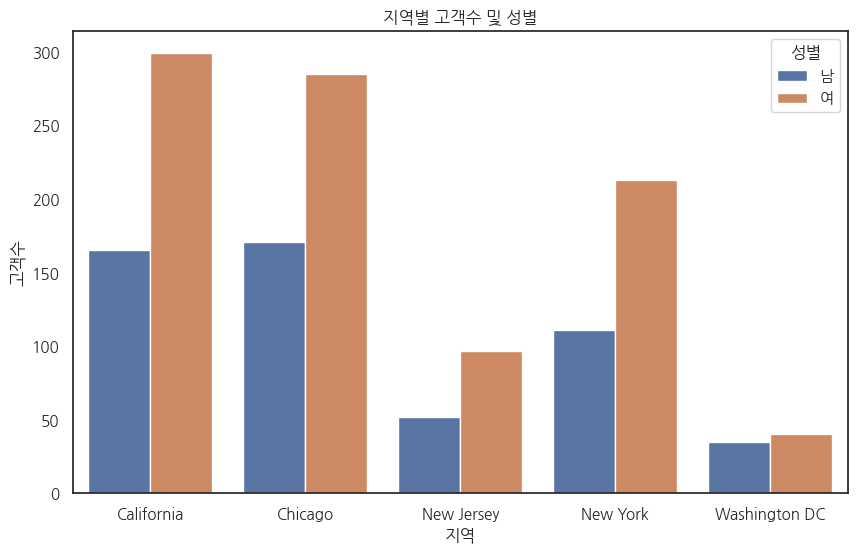

In [ ]:
# 고객 지역, 성별 시각화
cus_area_sex = customer.groupby(['고객지역', '성별'])['고객ID'].count().reset_index()
cus_area_sex.columns = ['지역', '성별', '고객수']

plt.figure(figsize=(10, 6))
sns.barplot(data=cus_area_sex, x='지역', y='고객수', hue='성별')
plt.title('지역별 고객수 및 성별')
plt.xticks(rotation=0)
plt.show()

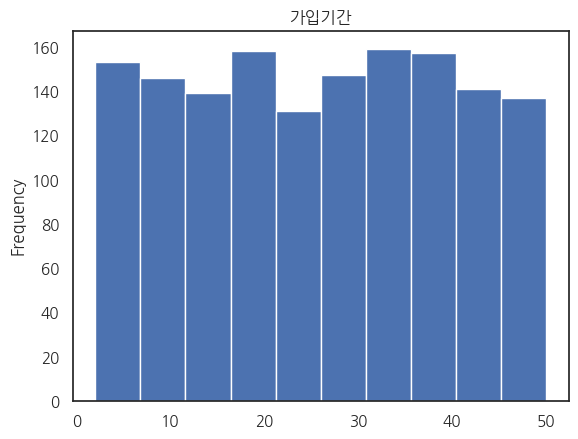

In [ ]:
# 가입기간
plt.title('가입기간')
customer['가입기간'].plot(kind='hist');

## 2.2 Discount_info

In [ ]:
discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


> 할인과 관련된 정보
- 월 : 월(Month) 정보
- 제품카테고리 : 제품이 포함된 카테고리
- 쿠폰코드 : 쿠폰코드
- 할인율 : 해당 쿠폰에 대한 할인율(%)

In [ ]:
# 쿠폰 발급한 카테고리
discount['제품카테고리'].unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

In [ ]:
# 카테고리별 쿠폰 발급수
discount['제품카테고리'].value_counts()

Apparel                 12
Waze                    12
Notebooks & Journals    12
Gift Cards              12
Accessories             12
Housewares              12
Nest-Canada             12
Bottles                 12
Nest                    12
Nest-USA                12
Headgear                12
Notebooks               12
Bags                    12
Lifestyle               12
Drinkware               12
Office                  12
Android                 12
Name: 제품카테고리, dtype: int64

In [ ]:
# 할인율
discount['할인율'].unique()

array([10, 20, 30])

In [ ]:
# 월 맵핑
month_mapping = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
                 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
discount['연도'] = '2019'
discount['월'] = discount['월'].map(month_mapping)

discount['날짜'] = discount['연도'] + '-' + discount['월']
discount['날짜'] = pd.to_datetime(discount['날짜'])
# 연도-월까지만 산출
discount['연도-월'] = discount['날짜'].dt.strftime('%Y-%m')

In [ ]:
discount.head()

,월,제품카테고리,쿠폰코드,할인율,연도,날짜,연도-월
0,01,Apparel,SALE10,10,2019,2019-01-01,2019-01
1,02,Apparel,SALE20,20,2019,2019-02-01,2019-02
2,03,Apparel,SALE30,30,2019,2019-03-01,2019-03
3,01,Nest-USA,ELEC10,10,2019,2019-01-01,2019-01
4,02,Nest-USA,ELEC20,20,2019,2019-02-01,2019-02


## 2.3 Onlinesales_info

In [ ]:
onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
onlinesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


> 온라인거래와 관련된 정보
- 고객ID : 고객 고유 ID
- 거래ID : 거래 고유 ID
- 거래날짜 : 거래가 이루어진 날짜
- 제품ID : 제품 고유 ID
- 제품카테고리 : 제품이 포함된 카테고리
- 수량 : 주문한 품목 수
- 평균금액 : 수량 1개당 가격 (단위 : 달러)
- 동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음
- 배송료 : 배송비용 (단위 : 달러)
- 쿠폰상태 : 할인쿠폰 적용 상태

In [ ]:
# 거래날짜 Datetime 변경
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])
onlinesales['연도-월'] = onlinesales['거래날짜'].dt.strftime('%Y-%m')

In [ ]:
print('거래날짜 길이 :',onlinesales['거래날짜'].min(), '~' ,onlinesales['거래날짜'].max())

거래날짜 길이 : 2019-01-01 00:00:00 ~ 2019-12-31 00:00:00


In [ ]:
# 고객 주문건수 상위 10개
onlinesales['고객ID'].value_counts().head(10).reset_index()

,index,고객ID
0,USER_0118,695
1,USER_0736,587
2,USER_0563,575
3,USER_1355,572
4,USER_0643,523
5,USER_0202,366
6,USER_0667,315
7,USER_1358,297
8,USER_0572,290
9,USER_0200,261


In [ ]:
onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,연도-월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2019-01
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,2019-01
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,2019-01


In [ ]:
# 총 금액 컬럼 생성
onlinesales['총금액'] = onlinesales['수량'] * onlinesales['평균금액']

In [ ]:
onlinesales.groupby('고객ID').agg({'거래날짜': ['min', 'max'], '수량':'sum', '총금액':'sum', '배송료':'sum'}).reset_index()

고객ID       거래날짜              수량       총금액     배송료
                       min        max  sum       sum     sum
0     USER_0000 2019-09-15 2019-09-15    3     30.99  150.00
1     USER_0001 2019-03-24 2019-11-02  342  13834.90  665.14
2     USER_0002 2019-06-22 2019-10-19  209   1442.12  197.15
3     USER_0003 2019-12-14 2019-12-14   21   1360.07  127.88
4     USER_0004 2019-09-15 2019-09-15   56   1442.47  637.49
...         ...        ...        ...  ...       ...     ...
1463  USER_1463 2019-04-05 2019-04-05   46    544.34  278.33
1464  USER_1464 2019-06-22 2019-10-05  141   2363.05  632.42
1465  USER_1465 2019-04-05 2019-06-20   10    101.56   51.50
1466  USER_1466 2019-10-23 2019-10-23    2    298.00    6.00
1467  USER_1467 2019-07-29 2019-10-10  155   6362.77  717.74

[1468 rows x 6 columns]

In [ ]:
# 카테고리별 판매수
onlinesales['제품카테고리'].value_counts().reset_index()[:10]

,index,제품카테고리
0,Apparel,18126
1,Nest-USA,14013
2,Office,6513
3,Drinkware,3483
4,Lifestyle,3092
5,Nest,2198
6,Bags,1882
7,Headgear,771
8,Notebooks & Journals,749
9,Waze,554


In [ ]:
# 쿠폰 상태
# Clicked 쿠폰 사용 버튼을 눌렀으나 결제에는 쿠폰 사용이 안된 상태
onlinesales['쿠폰상태'].value_counts().reset_index()

,index,쿠폰상태
0,Clicked,26926
1,Used,17904
2,Not Used,8094


## 2.4 marketing_info

In [ ]:
marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


> 마케팅비용과 관련된 정보
- 날짜 : 마케팅이 이루어진 날짜
- 오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러)
- 온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러)

In [ ]:
# 날짜 변경, 총 비용 컬럼 생성
marketing['날짜'] = pd.to_datetime(marketing['날짜'])
marketing['총비용'] = marketing['오프라인비용'] + marketing['온라인비용']

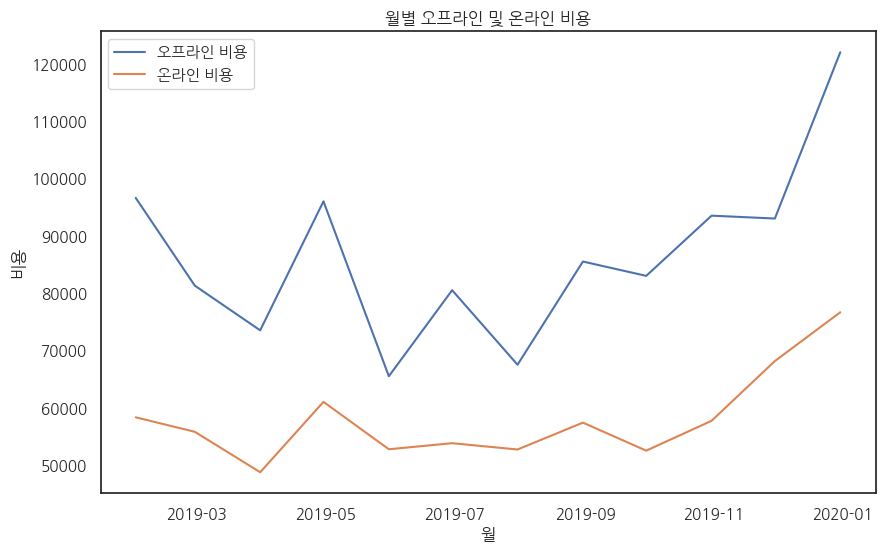

In [ ]:
# 월별로 데이터 집계하여 평균값 계산
monthly_marketing = marketing.resample('M', on='날짜').sum()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_marketing.index, monthly_marketing['오프라인비용'], label='오프라인 비용')
plt.plot(monthly_marketing.index, monthly_marketing['온라인비용'], label='온라인 비용')
plt.xlabel('월')
plt.ylabel('비용')
plt.title('월별 오프라인 및 온라인 비용')
plt.legend()
plt.show()

## 2.5 tax_info

In [ ]:
tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


> 세금과 관련된 정보
- 제품 카테고리 : 제품이 포함된 카테고리
- GST : Goods and Services Tax(%)

# 3.Data Set

## 3.1 OnlineSales_info

In [ ]:
# discount
coupon = discount.copy()

# online sales
sale = onlinesales.copy()

# merge sale coupon
sale_coupon = pd.merge(sale, coupon, on = ['연도-월','제품카테고리'], how = 'left')
sale_coupon = sale_coupon.drop(['연도-월','월','연도','날짜'], axis = 1)
sale_coupon.fillna(0, inplace = True)

# merge sale coupon tax
sale_coupon_tax = pd.merge(sale_coupon, tax, on = '제품카테고리', how = 'left')
sale_coupon_tax.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,쿠폰코드,할인율,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,ELEC10,10.0,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,ELEC10,10.0,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,OFF10,10.0,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,SALE10,10.0,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,AIO10,10.0,0.18


### 금액, 건수

#### 주간 총금액

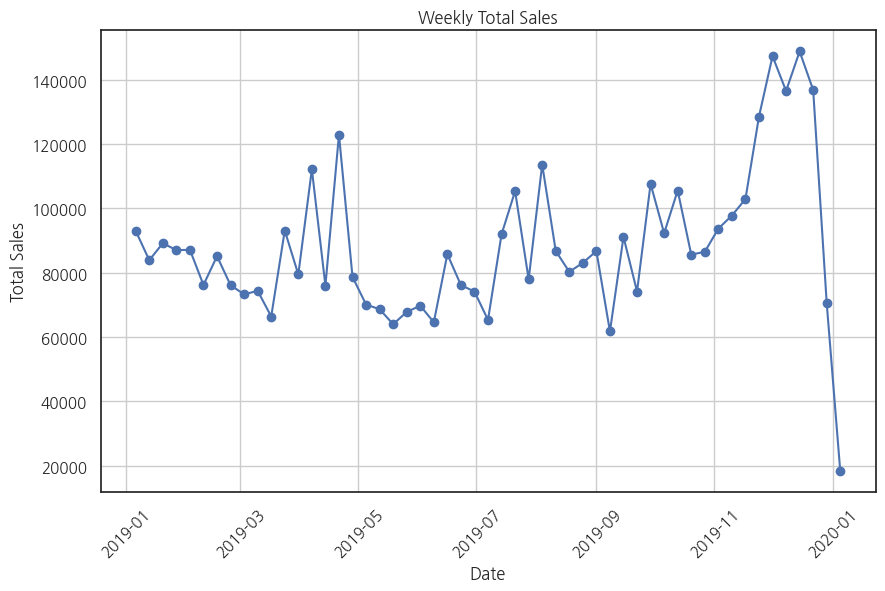

In [ ]:
set_index = sale_coupon_tax.set_index('거래날짜')
weekly_sales = set_index.resample('W').sum()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
plt.plot(weekly_sales.index, weekly_sales['총금액'], marker='o', linestyle='-')

# 그래프 제목과 축 레이블 설정
plt.title('Weekly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# x 축 눈금 라벨 회전
plt.xticks(rotation=45)

# 그리드 표시
plt.grid(True)

# 그래프 표시
plt.show()

#### 월별 총금액

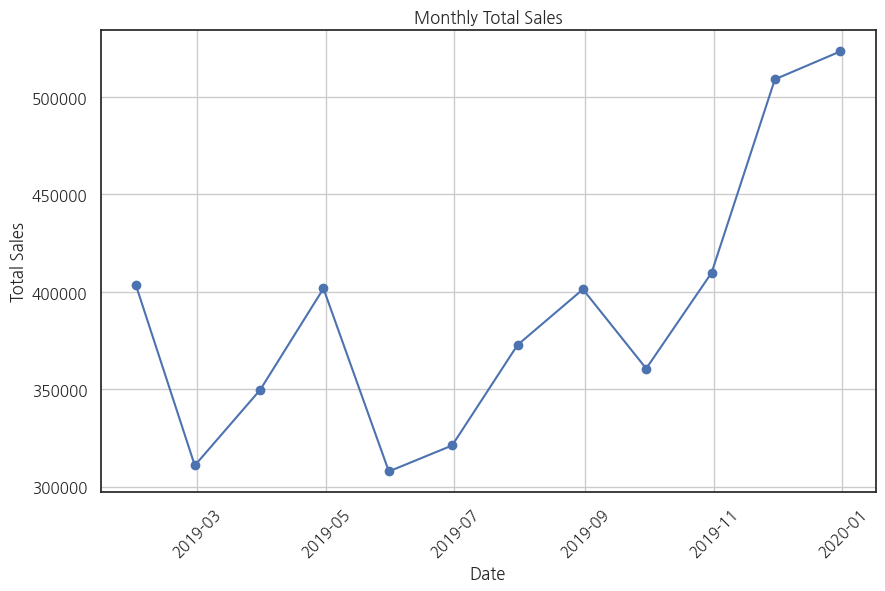

In [ ]:
monthly_sales = set_index.resample('M').sum()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
plt.plot(monthly_sales.index, monthly_sales['총금액'], marker='o', linestyle='-')

# 그래프 제목과 축 레이블 설정
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# x 축 눈금 라벨 회전
plt.xticks(rotation=45)

# 그리드 표시
plt.grid(True)

# 그래프 표시
plt.show()

### 제품카테고리별

#### 제품카테고리별 총금액, 판매 건수

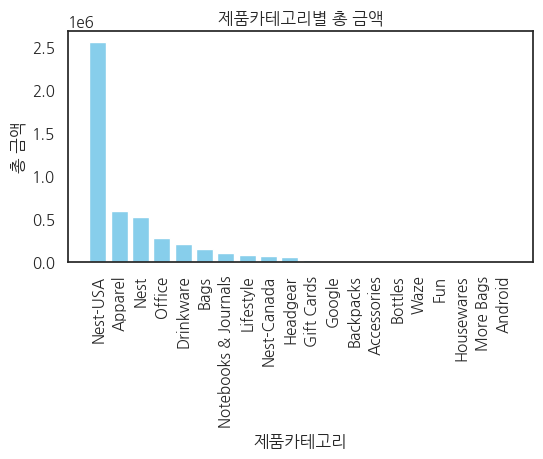

In [ ]:
category_amount = sale_coupon_tax.groupby('제품카테고리')['총금액'].sum().reset_index()
category_amount.sort_values(by='총금액', ascending=False, inplace=True)

plt.figure(figsize=(6, 3))
plt.bar(category_amount['제품카테고리'], category_amount['총금액'], color='skyblue')
plt.xlabel('제품카테고리')
plt.ylabel('총 금액')
plt.title('제품카테고리별 총 금액')
plt.xticks(rotation=90)
plt.show()

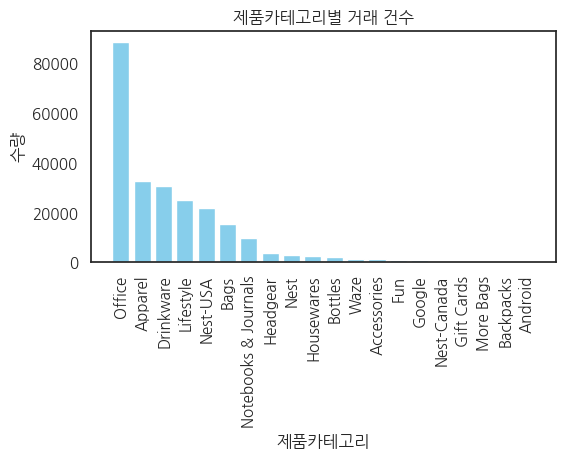

In [ ]:
category_cnt = sale_coupon_tax.groupby('제품카테고리')['수량'].sum().reset_index()
category_cnt.sort_values(by='수량', ascending=False, inplace=True)

plt.figure(figsize=(6, 3))
plt.bar(category_cnt['제품카테고리'], category_cnt['수량'], color='skyblue')
plt.xlabel('제품카테고리')
plt.ylabel('수량')
plt.title('제품카테고리별 거래 건수')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 월별 카테고리별 수랑, 총금액 합산
category_month_sales = sale_coupon_tax.groupby([pd.Grouper(freq='M',key="거래날짜"), '제품카테고리'])['수량','총금액'].sum().reset_index()
category_month_sales.head()

,거래날짜,제품카테고리,수량,총금액
0,2019-01-31,Accessories,1,51.57
1,2019-01-31,Android,4,74.24
2,2019-01-31,Apparel,1500,38300.87
3,2019-01-31,Backpacks,3,268.19
4,2019-01-31,Bags,860,10903.63


#### 제품카테고리별 시계열

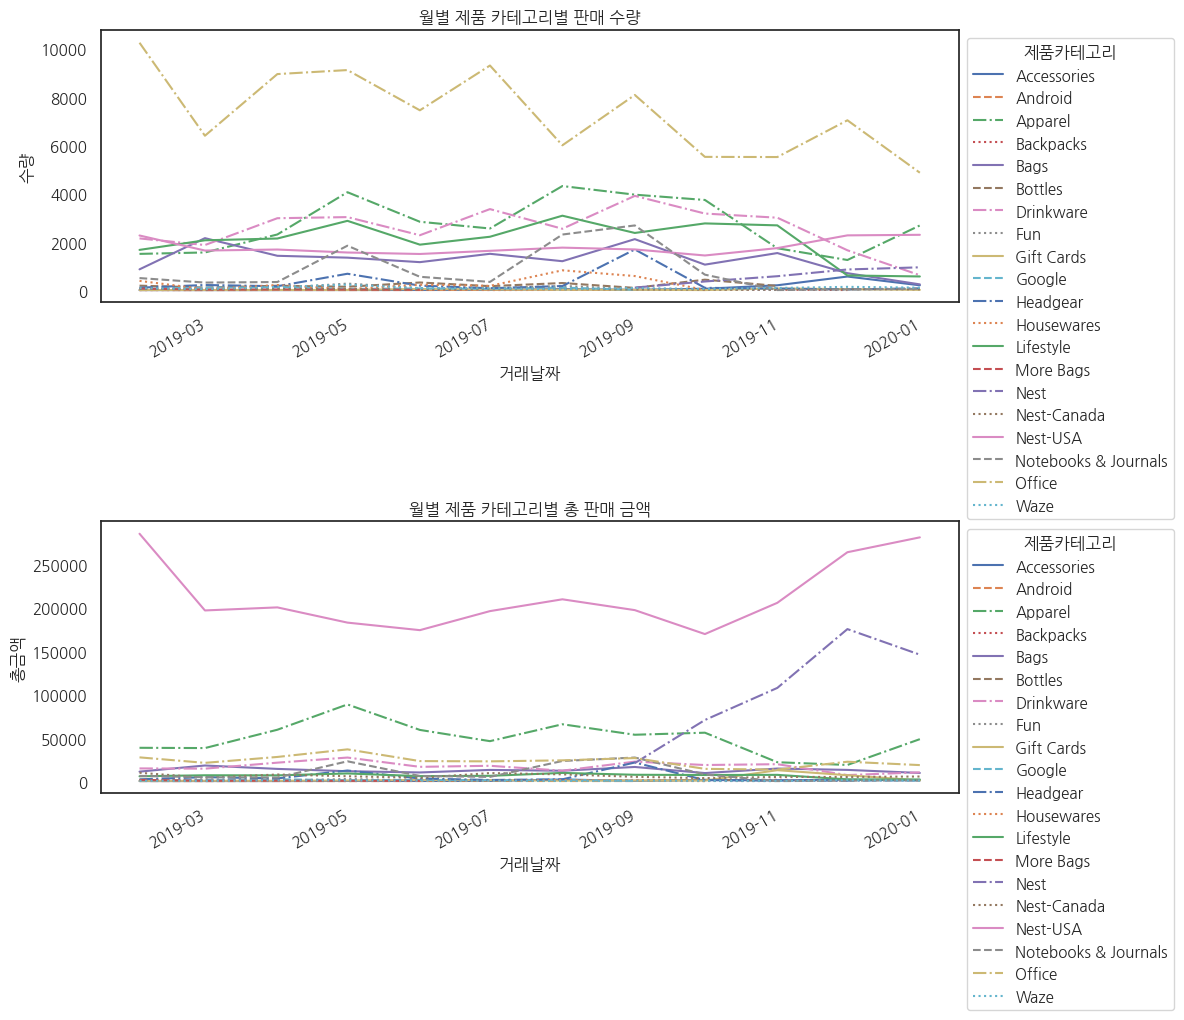

In [ ]:
# 시각화
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# 선 스타일 리스트
line_styles = ['-', '--', '-.', ':']

# 월별 수량
for i, (category, data) in enumerate(category_month_sales.groupby('제품카테고리')):
    data.plot(x='거래날짜', y='수량', ax=axes[0], label=category, linestyle=line_styles[i % len(line_styles)])

axes[0].set_title('월별 제품 카테고리별 판매 수량')
axes[0].set_xlabel('거래날짜')
axes[0].set_ylabel('수량')

# 월별 총 금액
for i, (category, data) in enumerate(category_month_sales.groupby('제품카테고리')):
    data.plot(x='거래날짜', y='총금액', ax=axes[1], label=category, linestyle=line_styles[i % len(line_styles)])

axes[1].set_title('월별 제품 카테고리별 총 판매 금액')
axes[1].set_xlabel('거래날짜')
axes[1].set_ylabel('총금액')

# 범례 위치 조정
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title="제품카테고리")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title="제품카테고리")

plt.tight_layout()
plt.show()

#### 제품카테고리별 평균구매주기


In [ ]:
categories_duration = onlinesales.copy()
categories_duration = categories_duration[['거래날짜','제품ID','제품카테고리']]
categories_duration.head(3)

,거래날짜,제품ID,제품카테고리
0,2019-01-01,Product_0981,Nest-USA
1,2019-01-01,Product_0981,Nest-USA
2,2019-01-01,Product_0904,Office


In [ ]:
# 월별 카테고리 그룹화
categories_duration = categories_duration.groupby(['거래날짜','제품카테고리']).count().reset_index()
categories_duration = categories_duration[['거래날짜', '제품카테고리']]

# 제품 카테고리로 그룹화하고, 각 그룹에서 최근 거래일과 이전 거래일 사이의 기간을 계산
categories_duration['이전거래날짜'] = categories_duration.groupby(['제품카테고리'])['거래날짜'].shift(1)
categories_duration['구매주기'] = (categories_duration['거래날짜'] - categories_duration['이전거래날짜']).dt.days

# 제품 카테고리별 평균 구매 주기 계산
catergories_duration_mean = categories_duration.groupby('제품카테고리')['구매주기'].mean().reset_index()

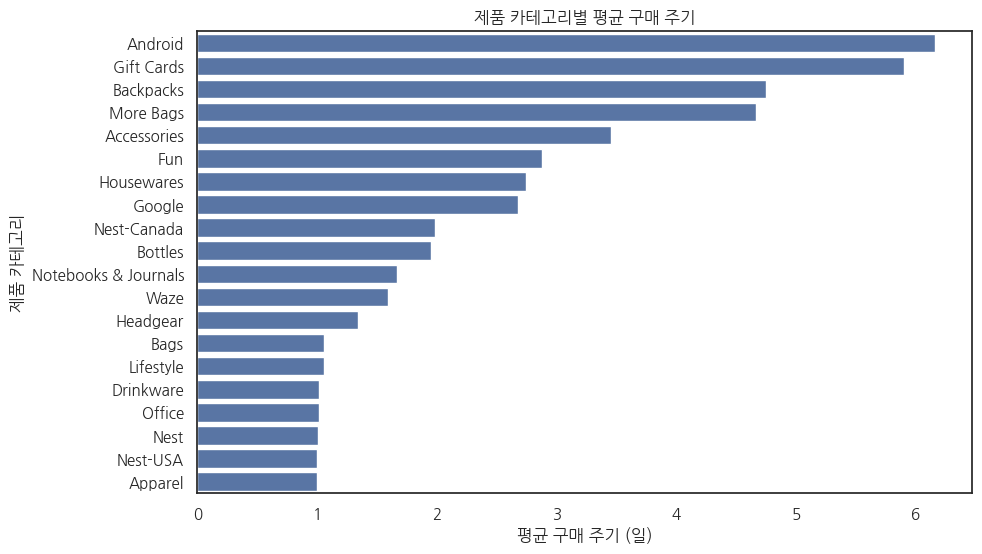

In [ ]:
# 시각화 설정
plt.figure(figsize=(10, 6))

# 평균 구매 주기를 기준으로 내림차순 정렬
catergories_duration_mean_sorted = catergories_duration_mean.sort_values(by='구매주기', ascending=False)

# 막대 그래프 그리기
sns.barplot(x='구매주기', y='제품카테고리', data=catergories_duration_mean_sorted)

# 그래프 타이틀 및 축 라벨 설정
plt.title('제품 카테고리별 평균 구매 주기')
plt.xlabel('평균 구매 주기 (일)')
plt.ylabel('제품 카테고리')

# 그래프 출력
plt.show()

#### 제품ID별 구매주기


In [ ]:
product_sales = onlinesales[['거래날짜','제품ID','제품카테고리']]
product_sales = product_sales.groupby(['거래날짜','제품ID']).count().reset_index()
product_sales = product_sales[['거래날짜', '제품ID']]

# 제품 그룹화하고, 각 그룹에서 최근 거래일과 이전 거래일 사이의 기간을 계산
product_sales['이전거래날짜'] = product_sales.groupby(['제품ID'])['거래날짜'].shift(1)
product_sales['구매주기'] = (product_sales['거래날짜'] - product_sales['이전거래날짜']).dt.days

# 제품 카테고리별 평균 구매 주기 계산
product_sales_mean = product_sales.groupby('제품ID')['구매주기'].mean().reset_index()
product_sales_mean = product_sales_mean[product_sales_mean['구매주기'] > 0]
product_sales_mean.head(3)

,제품ID,구매주기
0,Product_0000,19.692308
1,Product_0001,17.375000
2,Product_0002,10.642857


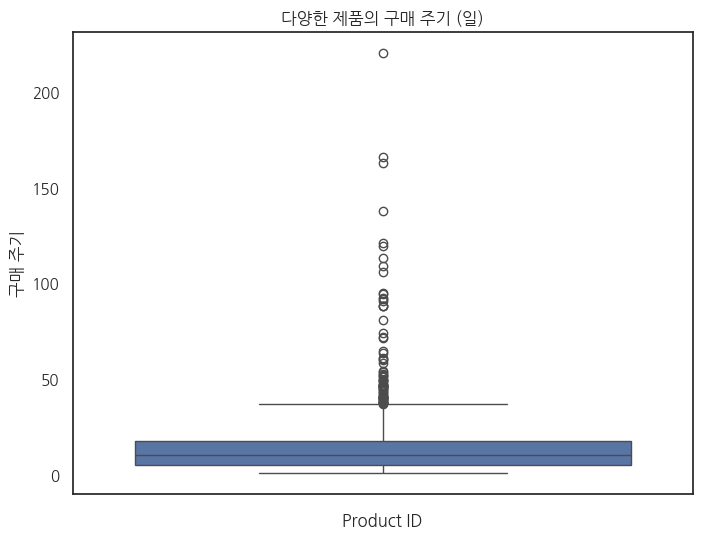

In [ ]:
# 시각화
# 특정 제품ID
plt.figure(figsize=(8, 6))
sns.boxplot(product_sales_mean['구매주기'])
plt.xlabel('Product ID')
plt.ylabel('구매 주기')
plt.title('다양한 제품의 구매 주기 (일)')
plt.show()

### 고객별

#### 고객별 카테고리 평균구매주기

In [ ]:
# 월별 카테고리 그룹화
categories_duration = sale_coupon_tax.groupby(['고객ID','거래날짜','제품카테고리']).count().reset_index()
categories_duration = categories_duration[['고객ID','거래날짜','제품카테고리']]
# 제품 카테고리로 그룹화하고, 각 그룹에서 최근 거래일과 이전 거래일 사이의 기간을 계산
categories_duration['이전거래날짜'] = categories_duration.groupby(['고객ID','제품카테고리'])['거래날짜'].shift(1)
categories_duration['구매주기'] = (categories_duration['거래날짜']-categories_duration['이전거래날짜']).dt.days

customer_sales_duration = categories_duration.groupby(['고객ID','제품카테고리'])['구매주기'].sum().reset_index()
customer_sales_duration['구매일건수'] = sale_coupon_tax.groupby(['고객ID','제품카테고리'])['거래날짜'].nunique().reset_index()['거래날짜']

# 구매 주기 계산
customer_sales_duration['제품구매주기'] = customer_sales_duration.apply(lambda row: (row['구매주기'] / (row['구매일건수'] - 1)) if row['구매일건수'] > 1 else np.nan, axis=1)

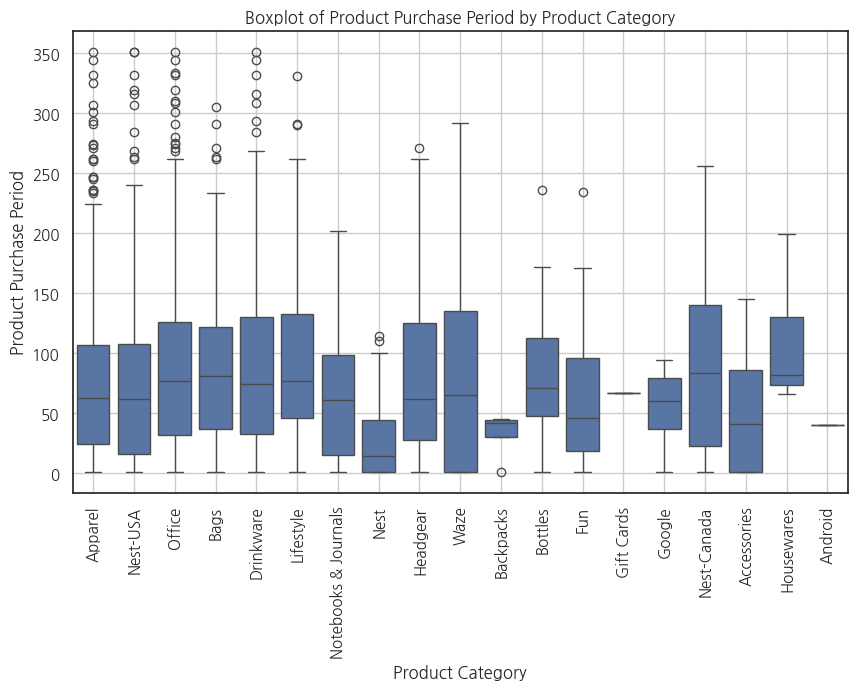

In [ ]:
# NaN 값을 제외한 데이터프레임 생성
valid_data = customer_sales_duration.dropna(subset=['제품구매주기'])

# 제품 카테고리별 제품 구매 주기 상자그림 생성
plt.figure(figsize=(10, 6))
sns.boxplot(data=valid_data, x='제품카테고리', y='제품구매주기')
plt.title('Boxplot of Product Purchase Period by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Product Purchase Period')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.grid(True)
plt.show()

- Fun, Android는 구매주기가 없다.

#### 고객, 상품별 평균 구매주기


In [ ]:
user_product_sales = onlinesales[['고객ID','거래날짜','제품ID','제품카테고리']]
user_product_sales.head(3)

,고객ID,거래날짜,제품ID,제품카테고리
0,USER_1358,2019-01-01,Product_0981,Nest-USA
1,USER_1358,2019-01-01,Product_0981,Nest-USA
2,USER_1358,2019-01-01,Product_0904,Office


In [ ]:
user_product_sales = user_product_sales.groupby(['고객ID','거래날짜','제품ID']).count().reset_index()
user_product_sales = user_product_sales[['고객ID','거래날짜','제품ID']]
user_product_sales.head()

,고객ID,거래날짜,제품ID
0,USER_0000,2019-09-15,Product_0048
1,USER_0000,2019-09-15,Product_0946
2,USER_0001,2019-03-24,Product_0283
3,USER_0001,2019-03-24,Product_0338
4,USER_0001,2019-03-24,Product_0388


In [ ]:
# 제품 그룹화하고, 각 그룹에서 최근 거래일과 이전 거래일 사이의 기간을 계산
user_product_sales['이전거래날짜'] = user_product_sales.groupby(['고객ID','제품ID'])['거래날짜'].shift(1)
user_product_sales['구매주기'] = (user_product_sales['거래날짜'] - user_product_sales['이전거래날짜']).dt.days

In [ ]:
# 제품 카테고리별 평균 구매 주기 계산
user_product_sales_mean = user_product_sales.groupby('제품ID')['구매주기'].mean().reset_index()
user_product_sales_mean = user_product_sales_mean[user_product_sales_mean['구매주기'] > 0]
user_product_sales_mean.head(3)

,제품ID,구매주기
0,Product_0000,186.0
2,Product_0002,1.0
3,Product_0003,183.0


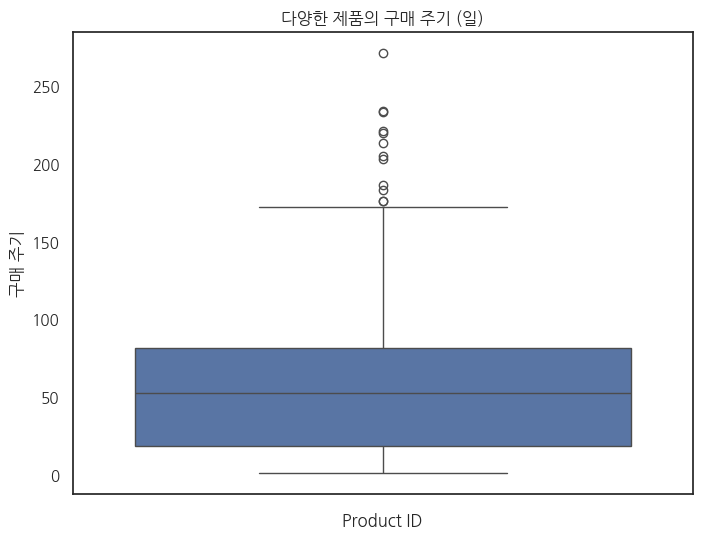

In [ ]:
# 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(user_product_sales_mean['구매주기'])
plt.xlabel('Product ID')
plt.ylabel('구매 주기')
plt.title('다양한 제품의 구매 주기 (일)')
plt.show()

#### 고객 재구매율

In [ ]:
# 코호트 분석에 사용될 데이터
cohort_df = sale_coupon_tax[['고객ID','거래ID','거래날짜','수량','총금액']]

In [ ]:
# 거래 날짜의 월
cohort_df['거래날짜_월'] = cohort_df['거래날짜'].dt.to_period('M')
# chort_월 : 해당 고객이 유입된 달
cohort_df['cohort_월'] = cohort_df.groupby('고객ID')['거래날짜_월'].transform('min')
cohort_df.sample(10)

,고객ID,거래ID,거래날짜,수량,총금액,거래날짜_월,cohort_월
27377,USER_0040,Transaction_12708,2019-07-18,1,5.10,2019-07,2019-07
44571,USER_0208,Transaction_20153,2019-11-01,1,349.00,2019-11,2019-11
21491,USER_0202,Transaction_10107,2019-06-09,3,7.17,2019-06,2019-02
19170,USER_1422,Transaction_9076,2019-05-23,1,13.29,2019-05,2019-05
13203,USER_1236,Transaction_6364,2019-04-12,1,38.49,2019-04,2019-01
29523,USER_0205,Transaction_13494,2019-07-30,1,149.00,2019-07,2019-01
52748,USER_0850,Transaction_24936,2019-12-29,1,151.88,2019-12,2019-02
8117,USER_0518,Transaction_4116,2019-03-05,15,22.50,2019-03,2019-01
31326,USER_1343,Transaction_14172,2019-08-08,2,298.00,2019-08,2019-02
32003,USER_1336,Transaction_14451,2019-08-11,3,17.10,2019-08,2019-01


In [ ]:
def get_month_int(df, column):
    month = df[column].dt.month
    day = df[column].dt.day
    return month, day

invoice_month, invoice_day = get_month_int(cohort_df, '거래날짜_월')
cohort_month, cohort_day = get_month_int(cohort_df, 'cohort_월')

In [ ]:
# cohort_index
month_diff = invoice_month - cohort_month

cohort_df['cohort_index'] =  month_diff + 1

In [ ]:
cohort_retention = cohort_df.groupby(['cohort_월', 'cohort_index'])['고객ID'].nunique().reset_index()
cohort_retention

,cohort_월,cohort_index,고객ID
0,2019-01,1,215
1,2019-01,2,13
2,2019-01,3,24
3,2019-01,4,34
4,2019-01,5,23
...,...,...,...
73,2019-10,2,6
74,2019-10,3,4
75,2019-11,1,68
76,2019-11,2,7


In [ ]:
# retetion 피벗테이블
pivot_retention = cohort_retention.pivot(index='cohort_월', columns='cohort_index', values='고객ID').round(1)
pivot_retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_월,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sizes = pivot_retention.iloc[:, 0]
retention = pivot_retention.divide(sizes, axis=0).round(2)
retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_월,,,,,,,,,,,,
2019-01,1.0,0.06,0.11,0.16,0.11,0.20,0.16,0.22,0.11,0.13,0.09,0.16
2019-02,1.0,0.07,0.09,0.17,0.18,0.23,0.20,0.16,0.12,0.11,0.17,NaN
2019-03,1.0,0.10,0.20,0.14,0.18,0.19,0.12,0.12,0.08,0.11,NaN,NaN
2019-04,1.0,0.09,0.15,0.15,0.11,0.09,0.06,0.10,0.07,NaN,NaN,NaN
2019-05,1.0,0.11,0.08,0.12,0.09,0.12,0.12,0.07,NaN,NaN,NaN,NaN
2019-06,1.0,0.15,0.16,0.09,0.08,0.10,0.08,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.14,0.04,0.06,0.12,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.10,0.11,0.07,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.08,0.04,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


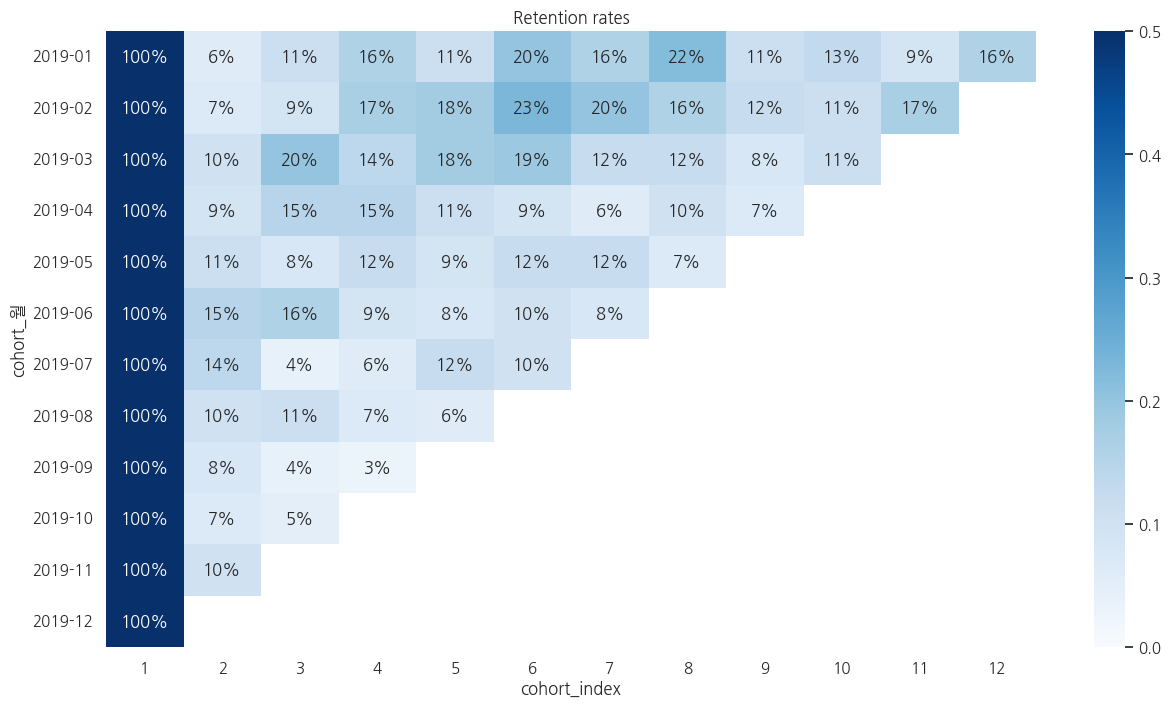

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='Blues')
plt.show()

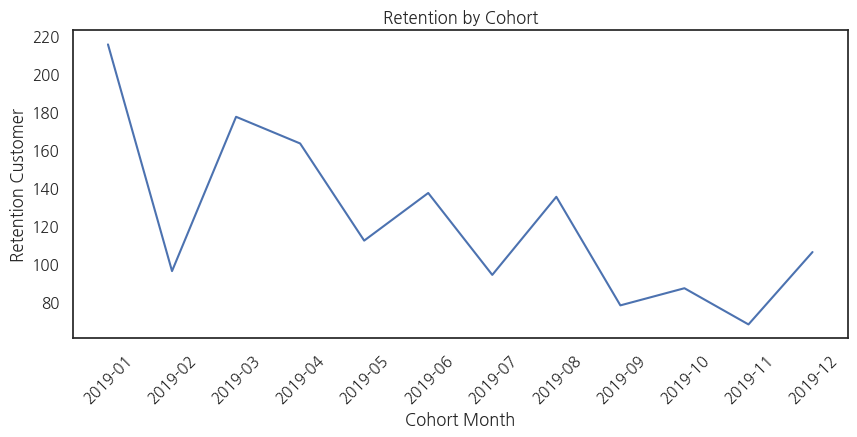

In [ ]:
# 월 별로 신규 구매 고객 수 추이
pivot_retention_str = pivot_retention[1].index.astype(str)

plt.figure(figsize=(10, 4))
plt.plot(pivot_retention_str, pivot_retention[1])
plt.title('Retention by Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Customer')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

#### 신규 고객 유입, 마케팅 비용 관계 시각화

In [ ]:
marketing['년월'] = marketing['날짜'].dt.to_period('M')

In [ ]:
retention_df = pd.DataFrame(pivot_retention[1]).reset_index()

retention_df.columns = ['년월', '신규 고객']

marketing_cost = marketing.groupby('년월')['총비용'].mean()
marketing_cost = pd.DataFrame(marketing_cost).reset_index()

marketing_cost.columns = ['년월', '총비용']

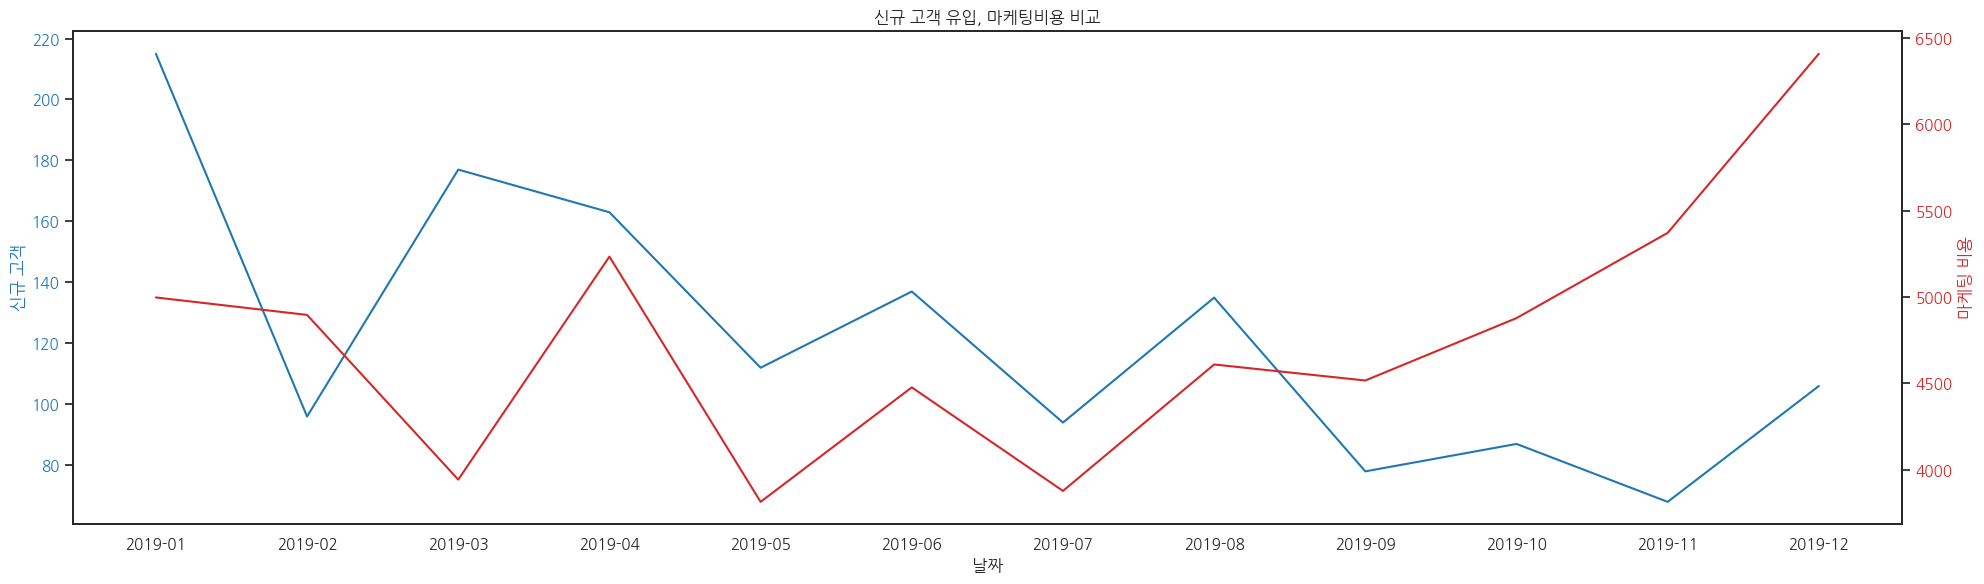

In [ ]:
# '년월' 컬럼을 문자열로 변환
retention_df['년월'] = retention_df['년월'].astype(str)
marketing_cost['년월'] = marketing_cost['년월'].astype(str)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 6))

color = 'tab:blue'
ax1.set_xlabel('날짜')
ax1.set_ylabel('신규 고객', color=color)
ax1.plot(retention_df['년월'], retention_df['신규 고객'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('마케팅 비용', color=color)
ax2.plot(marketing_cost['년월'], marketing_cost['총비용'], color=color, label='마케팅비용')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('신규 고객 유입, 마케팅비용 비교')
fig.tight_layout()
plt.show()

## 3.2 Customer_info

In [ ]:
# 고객 데이터
customer.head(3)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33


### 방문일수

In [ ]:
# 방문일 수
customer_visit_days = sale_coupon_tax.groupby(['고객ID','거래날짜'])['거래ID'].count().reset_index().groupby('고객ID')['거래날짜'].count().reset_index()
customer_visit_days.columns = ['고객ID','방문일수']
customer_visit_days.head(3)

,고객ID,방문일수
0,USER_0000,1
1,USER_0001,3
2,USER_0002,2


### 마지막 방문일

In [ ]:
# 거래 마지막 날짜
sale_coupon_tax['거래날짜'].max()

Timestamp('2019-12-31 00:00:00')

In [ ]:
# 마지막 방문일
customer_last_visit = sale_coupon_tax.groupby('고객ID')['거래날짜'].max().reset_index()
customer_last_visit.columns = ['고객ID','마지막방문일']
customer_last_visit['마지막일'] = sale_coupon_tax['거래날짜'].max()
customer_last_visit['마지막방문'] = (customer_last_visit['마지막일'] - customer_last_visit['마지막방문일']).dt.days
customer_last_visit.head(3)

,고객ID,마지막방문일,마지막일,마지막방문
0,USER_0000,2019-09-15,2019-12-31,107
1,USER_0001,2019-11-02,2019-12-31,59
2,USER_0002,2019-10-19,2019-12-31,73


### 거래 건수

In [ ]:
# 거래 건수
customer_cnt = sale_coupon_tax.groupby(['고객ID','거래날짜'])['거래ID'].count().reset_index()
customer_cnt = customer_cnt[['고객ID', '거래ID']]
customer_cnt.columns = ['고객ID','거래횟수']
customer_cnt.head(3)

,고객ID,거래횟수
0,USER_0000,2
1,USER_0001,31
2,USER_0001,4


### 거래 금액

In [ ]:
customer_amount = sale_coupon_tax.groupby(['고객ID'])['총금액'].sum().reset_index()
customer_amount.head(3)

,고객ID,총금액
0,USER_0000,30.99
1,USER_0001,13834.90
2,USER_0002,1442.12


### 구매기간

In [ ]:
customer_first_transaction = sale_coupon_tax.groupby('고객ID')['거래날짜'].min().reset_index()
customer_first_transaction.columns = ['고객ID','최초구매일']
customer_last_transaction = sale_coupon_tax.groupby('고객ID')['거래날짜'].max().reset_index()
customer_last_transaction.columns = ['고객ID','마지막구매일']

customer_transaction_length = pd.merge(customer_first_transaction, customer_last_transaction,on='고객ID')
customer_transaction_length['Length'] = (customer_transaction_length['마지막구매일'] - customer_transaction_length['최초구매일']).dt.days
customer_transaction_length.head(3)

,고객ID,최초구매일,마지막구매일,Length
0,USER_0000,2019-09-15,2019-09-15,0
1,USER_0001,2019-03-24,2019-11-02,223
2,USER_0002,2019-06-22,2019-10-19,119


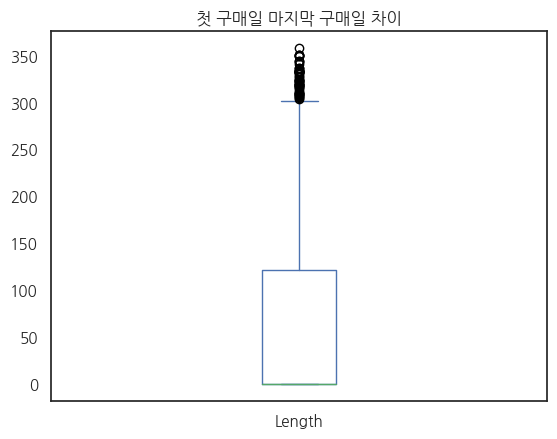

In [ ]:
plt.title('첫 구매일 마지막 구매일 차이')
customer_transaction_length['Length'].plot(kind='box')
plt.show()

### 유저별 카테고리별 구매기간

In [ ]:
selected_data = onlinesales[['고객ID', '거래날짜', '제품카테고리']]

# 각 고객의 각 제품 카테고리별로 최종 구매일과 처음 구매일을 계산하여 새로운 DataFrame 생성
customer_category_dates = selected_data.groupby(['고객ID', '제품카테고리'])['거래날짜'].agg(['min', 'max']).reset_index()

# 구매 주기를 계산하기 위해 각 고객의 각 제품 카테고리별로 구매 주기를 계산
customer_category_dates['구매길이'] = (customer_category_dates['max'] - customer_category_dates['min']).dt.days

In [ ]:
# 구매 건수가 1번인 건 제외(재구매가 이뤄지지 않은 것)
customer_category_dates[customer_category_dates['구매길이'] != 0]

,고객ID,제품카테고리,min,max,구매길이
3,USER_0001,Apparel,2019-03-24,2019-11-02,223
10,USER_0001,Nest-USA,2019-03-24,2019-11-02,223
11,USER_0001,Office,2019-03-24,2019-11-02,223
12,USER_0002,Apparel,2019-06-22,2019-10-19,119
13,USER_0002,Bags,2019-06-22,2019-10-19,119
...,...,...,...,...,...
8873,USER_1467,Apparel,2019-07-29,2019-10-10,73
8874,USER_1467,Bags,2019-07-29,2019-10-10,73
8876,USER_1467,Drinkware,2019-07-29,2019-10-10,73
8882,USER_1467,Nest-USA,2019-07-29,2019-10-10,73


In [ ]:
customer_category_dates[customer_category_dates['구매길이'] != 0].groupby('제품카테고리')['구매길이'].mean()

제품카테고리
Accessories              57.133333
Android                  40.000000
Apparel                 129.434932
Backpacks                43.250000
Bags                    127.917127
Bottles                  94.541667
Drinkware               127.883803
Fun                      95.000000
Gift Cards               67.000000
Google                   80.600000
Headgear                108.829268
Housewares              124.600000
Lifestyle               127.964912
Nest                     37.339450
Nest-Canada             100.304348
Nest-USA                131.074349
Notebooks & Journals     87.943662
Office                  135.553571
Waze                    101.458333
Name: 구매길이, dtype: float64

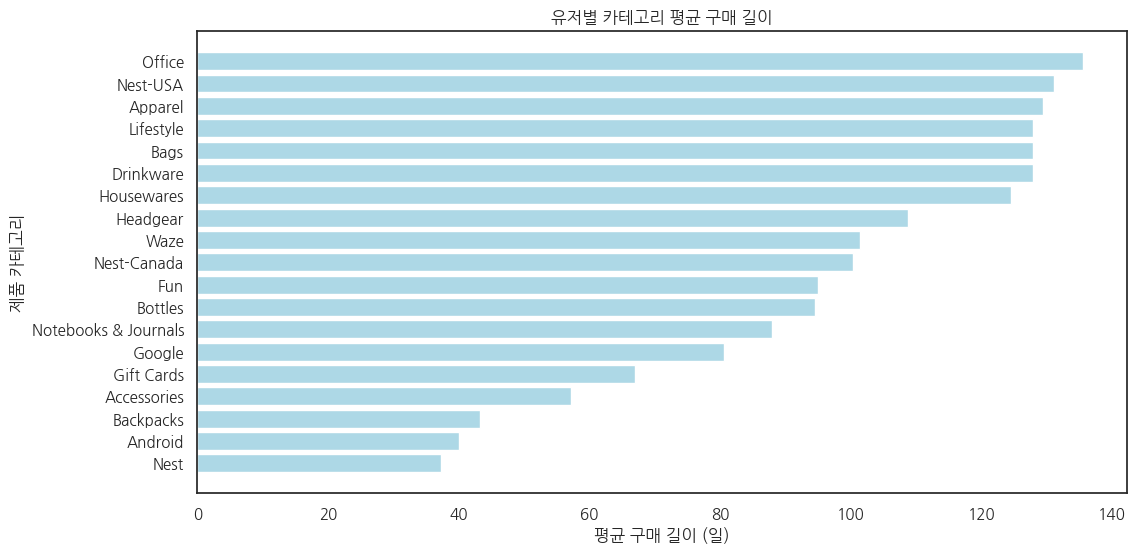

In [ ]:
# 시각화
average_purchase_cycle = customer_category_dates[customer_category_dates['구매길이'] != 0].groupby('제품카테고리')['구매길이'].mean()

average_purchase_cycle = average_purchase_cycle.sort_values(ascending=True)

categories = average_purchase_cycle.index
purchase_cycle = average_purchase_cycle.values

plt.figure(figsize=(12, 6))
plt.barh(categories, purchase_cycle ,color='lightblue')
plt.ylabel('제품 카테고리')
plt.xlabel('평균 구매 길이 (일)')
plt.title('유저별 카테고리 평균 구매 길이')
plt.show()

고객들의 재구매 주기의 영향이 큰거 같음

### 평균 구매 주기

In [ ]:
# 평균 구매주기 데이터프레임 생성
sales_periods = pd.DataFrame()
sales_periods['고객ID'] = sorted(customer['고객ID'])

# 구매 주기 계산
for name in sorted(customer['고객ID']):
  days_diff_range = []
  days_list = sale_coupon_tax[sale_coupon_tax['고객ID'] == name]['거래날짜'].unique()
  if len(days_list) == 1: # 구매일이 1일 경우
    sales_periods.loc[sales_periods['고객ID'] == name, '구매주기'] = 0
  else:
    for idx in range(len(days_list) - 1, 0 , -1): # 마지막 구매일 부터 처음 구매일 까지 차이일 계산
      days_diff_range.append(days_list[idx] - days_list[idx-1])
  nanoseconds = sum(days_diff_range)
  sales_periods.loc[sales_periods['고객ID'] == name, '구매주기'] = nanoseconds
  sales_periods.loc[sales_periods['고객ID'] == name, '일카운트'] = len(days_diff_range)

# 구매일이 2개 이상인 데이터 만 평균 구매주기 계산
non_zero_counts = sales_periods[sales_periods['일카운트'] != 0]
non_zero_counts['평균구매주기'] = non_zero_counts['구매주기'] / non_zero_counts['일카운트']

# 결과물 반환
sales_periods_df = pd.merge(sales_periods, non_zero_counts[['고객ID','평균구매주기']], on = '고객ID', how = 'left')
sales_periods_df['평균구매주기'].fillna(pd.Timedelta(seconds=0), inplace=True) # NaT 0으로 처리
sales_periods_df = sales_periods_df[['고객ID', '평균구매주기']]

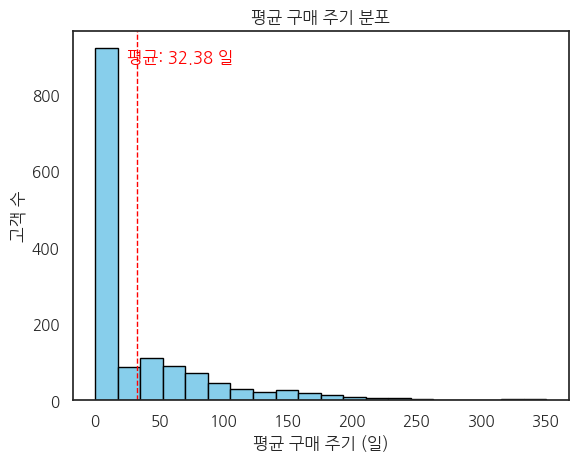

In [ ]:
# 평균 구매 주기를 히스토그램으로 시각화
plt.hist(sales_periods_df['평균구매주기'].dt.days, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('평균 구매 주기 (일)')
plt.ylabel('고객 수')
plt.title('평균 구매 주기 분포')
# 중앙선(평균값) 추가
mean_value = np.mean(sales_periods_df['평균구매주기'].dt.days)
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=1)
# 중앙선에 대한 텍스트 추가
plt.text(mean_value + 75 , plt.ylim()[1] * 0.95, f'평균: {mean_value:.2f} 일', color='red', ha='right', va='top')
plt.show()

### 쿠폰 사용

In [ ]:
# 쿠폰 사용 컬럼
coupon_use = sale_coupon_tax.groupby(['고객ID', '쿠폰상태']).size().unstack(fill_value=0).reset_index(drop=False)
coupon_use.columns = ['고객ID', '쿠폰사용실패', '쿠폰미사용','쿠폰사용']
coupon_use['구매건수'] = coupon_use['쿠폰사용'] + coupon_use['쿠폰미사용'] + coupon_use['쿠폰사용실패']
coupon_use.head()

,고객ID,쿠폰사용실패,쿠폰미사용,쿠폰사용,구매건수
0,USER_0000,0,0,2,2
1,USER_0001,26,14,20,60
2,USER_0002,11,1,11,23
3,USER_0003,8,3,6,17
4,USER_0004,17,8,11,36


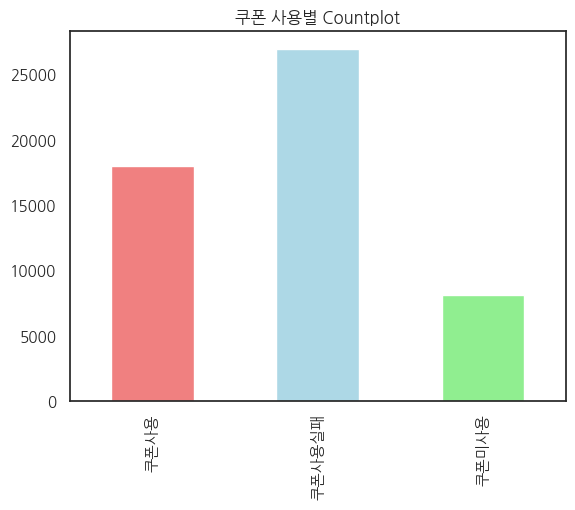

In [ ]:
plt.title('쿠폰 사용별 Countplot')
coupon_use[['쿠폰사용','쿠폰사용실패','쿠폰미사용']].sum(axis = 0).plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
plt.show()

### customer_df

In [ ]:
customer_df = pd.DataFrame()
customer_df['고객ID'] = sorted(customer['고객ID'])
customer_df['성별'] = list(customer.sort_values('고객ID')['성별'])
customer_df['지역'] = list(customer.sort_values('고객ID')['고객지역'])
customer_df['가입기간'] = list(customer.sort_values('고객ID')['가입기간'])
customer_df['L'] = customer_transaction_length['Length']
customer_df['R'] = customer_last_visit['마지막방문']
customer_df['F'] = customer_visit_days['방문일수']
customer_df['M'] = customer_amount['총금액']
customer_df['구매건수'] = coupon_use['구매건수']
customer_df['쿠폰미사용'] = coupon_use['쿠폰미사용']
customer_df['쿠폰사용'] = coupon_use['쿠폰사용']
customer_df['쿠폰사용실패'] = coupon_use['쿠폰사용실패']

In [ ]:
customer_df.head()

,고객ID,성별,지역,가입기간,L,R,F,M,구매건수,쿠폰미사용,쿠폰사용,쿠폰사용실패
0,USER_0000,여,New York,31,0,107,1,30.99,2,0,2,0
1,USER_0001,남,New York,20,223,59,3,13834.90,60,14,20,26
2,USER_0002,남,California,39,119,73,2,1442.12,23,1,11,11
3,USER_0003,남,California,25,0,17,1,1360.07,17,3,6,8
4,USER_0004,여,Chicago,31,0,107,1,1442.47,36,8,11,17


### 지역별 총판매 금액

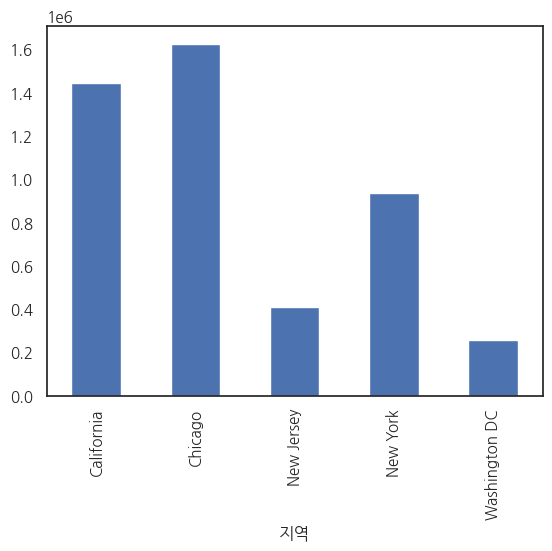

In [ ]:
customer_df.groupby('지역')['M'].sum().plot(kind = 'bar');

# 4.RFM 스코어 분석(가중치)

- Recency : 고객이 최근에 구매를 했는가
- Freqeuncy : 고객이 얼마나 빈번하게 상품 구매를 했는가
- Monetary : 고객이 구입했던 총 금액은 얼마인가

In [ ]:
# RFM DataFrame
rfm_df = pd.DataFrame()
rfm_df['고객ID'] = sorted(customer['고객ID'])
# RFM Columns
rfm_df['R'] = customer_last_visit['마지막방문']
rfm_df['F'] = customer_visit_days['방문일수']
rfm_df['M'] = customer_amount['총금액']

In [ ]:
rfm_df.sample(5)

,고객ID,R,F,M
791,USER_0791,343,1,2046.63
772,USER_0772,159,2,12865.57
1160,USER_1160,69,3,2727.92
496,USER_0496,266,2,1522.40
1246,USER_1246,192,2,1956.61


In [ ]:
rfm_df[['R','F','M']].describe()

,R,F,M
count,1468.000000,1468.000000,1468.000000
mean,144.292234,2.185286,3181.740204
std,101.936959,2.235245,5065.804553
min,0.000000,1.000000,1.000000
25%,55.000000,1.000000,652.412500
50%,131.000000,1.500000,1750.410000
75%,220.000000,3.000000,3917.887500
max,364.000000,34.000000,75937.550000


In [ ]:
# R의 최솟값은 0인데 추후 계산 시 복잡하기 때문에 1을 더해줌(R 간의 값들 중 상대적인 것을 보는 거라 상관없을 듯)
rfm_df['R'] = rfm_df['R'] + 1

In [ ]:
rfm_df[['R','F','M']].describe()

,R,F,M
count,1468.000000,1468.000000,1468.000000
mean,145.292234,2.185286,3181.740204
std,101.936959,2.235245,5065.804553
min,1.000000,1.000000,1.000000
25%,56.000000,1.000000,652.412500
50%,132.000000,1.500000,1750.410000
75%,221.000000,3.000000,3917.887500
max,365.000000,34.000000,75937.550000


In [ ]:
# 스코어의 특성(큰값이 좋은 것)을 반영하기 위해 R에 역수를 취해줌
rfm_df['re_R'] = 1 / rfm_df['R']

In [ ]:
from scipy.stats import norm, probplot

# 정규성, 데이터 분포 확인 위한 QQ_plot 시각화 함수
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    (mu, sigma) = norm.fit(data)

    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
   # QQ_plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

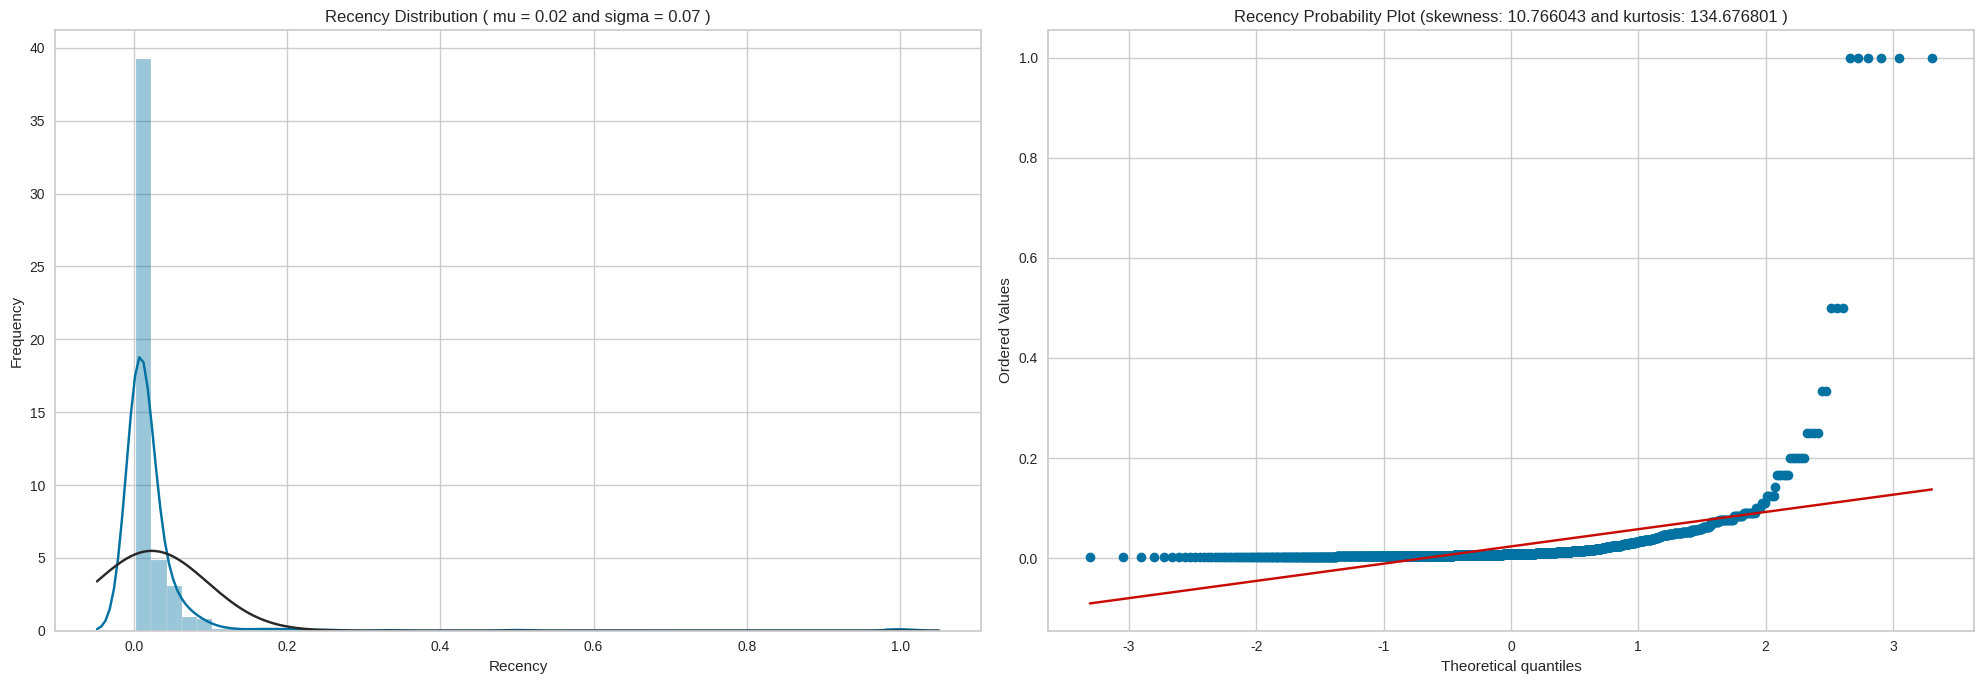

In [ ]:
# Recency 분포, 정규성 확인
QQ_plot(rfm_df.re_R, 'Recency')

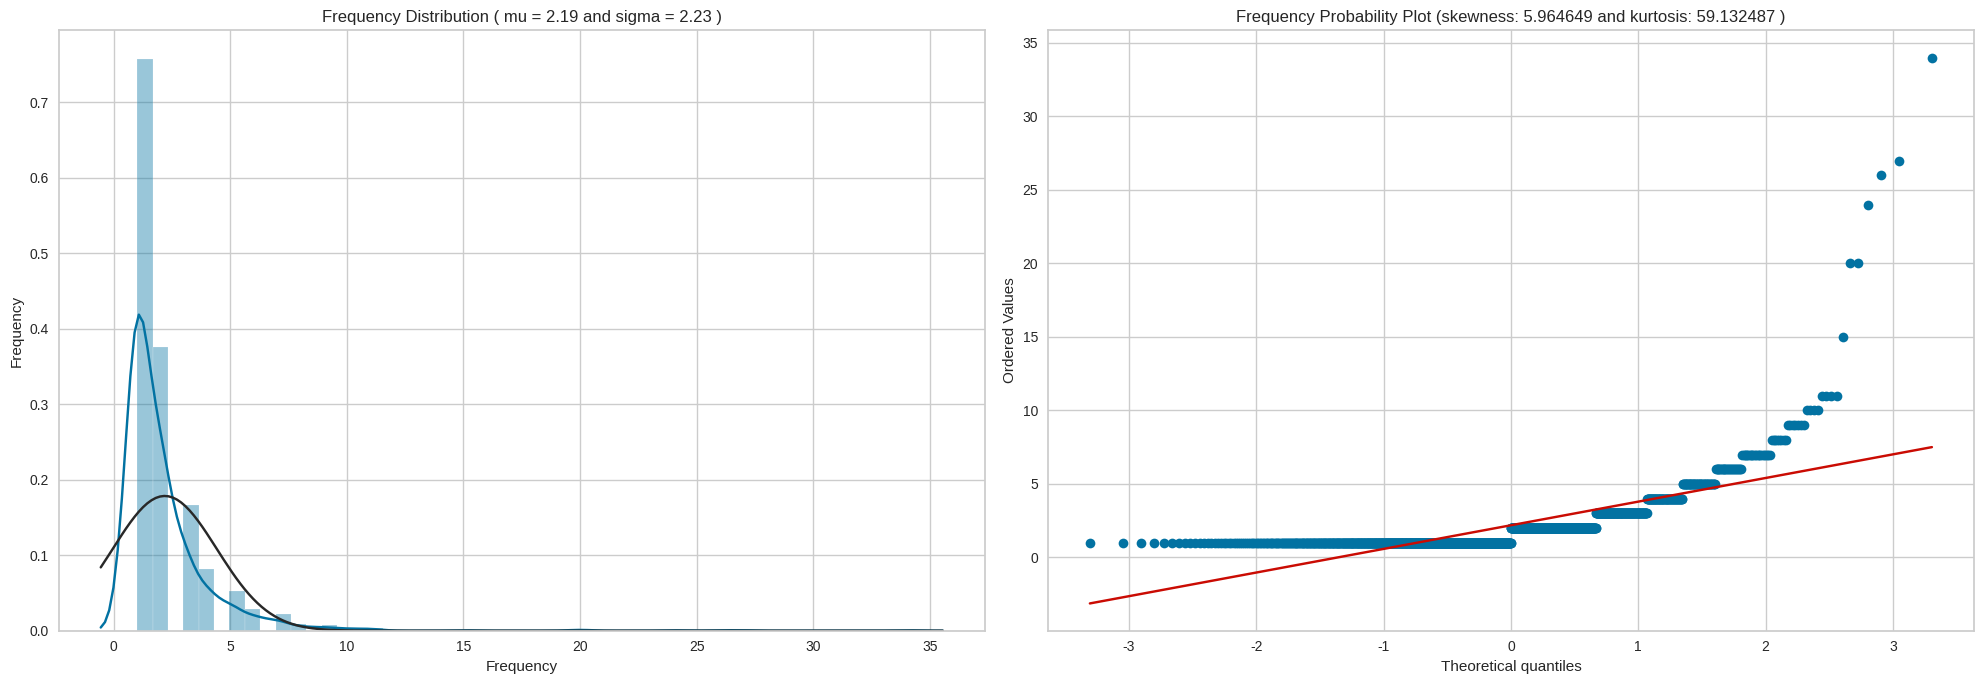

In [ ]:
# Frequency 분포, 정규성 확인
QQ_plot(lrfm.F, 'Frequency')

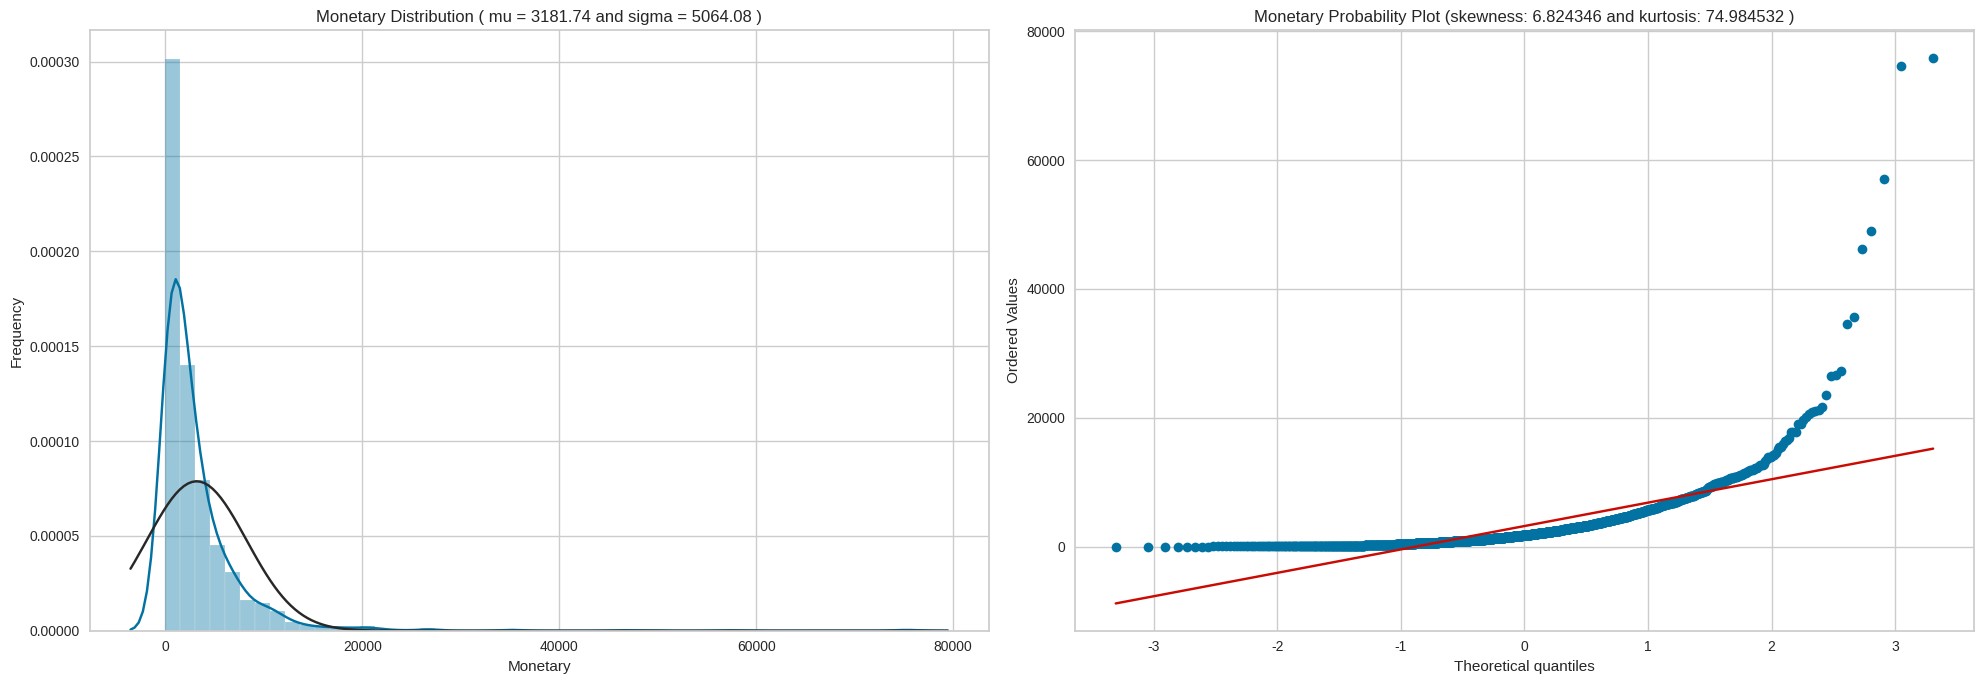

In [ ]:
# Monetary 분포, 정규성 확인
QQ_plot(lrfm.M, 'Monetary')

In [ ]:
# R, F, M 모두가 좌측으로 편향된 분포를 가지는 것을 확인할 수 있으며 분산이 지나치게 큰 값을 보임
import math
from sklearn.preprocessing import MinMaxScaler
# R, F, M 컬럼의 정규화를 위해 각각 log를 취함

rfm_df['R_log'] = rfm_df['re_R'].apply(lambda x: math.log(x) if x > 0 else 0)
rfm_df['F_log'] = rfm_df['F'].apply(lambda x: math.log(x) if x > 0 else 0)
rfm_df['M_log'] = rfm_df['M'].apply(lambda x: math.log(x) if x > 0 else 0)
features = ['R_log','F_log','M_log']

X_subset = rfm_df[features]

# 컬럼별로 표준화를 실행
scaler = MinMaxScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
rfm_log=pd.DataFrame(X_scaled, columns=X_subset.columns)

In [ ]:
rfm_log.describe()

,R_log,F_log,M_log
count,1468.000000,1468.000000,1468.000000
mean,0.221548,0.151562,0.641003
std,0.178105,0.179090,0.142200
min,0.000000,0.000000,0.000000
25%,0.085041,0.000000,0.576692
50%,0.172392,0.098281,0.664515
75%,0.317725,0.311543,0.736212
max,1.000000,1.000000,1.000000


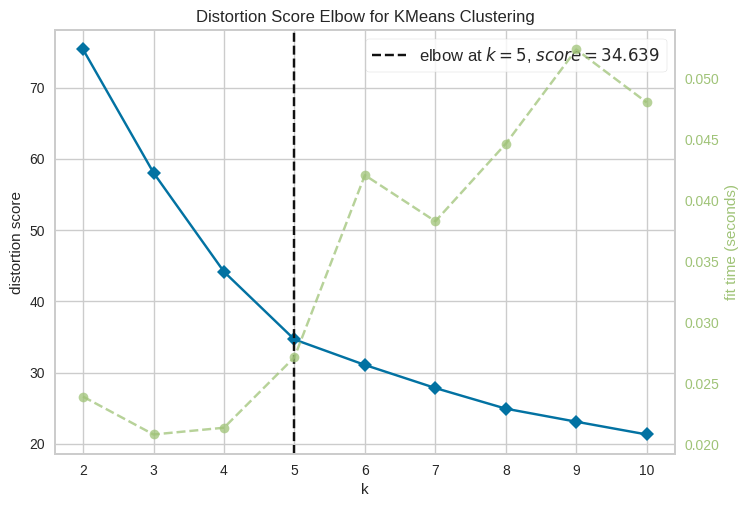

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 엘보우 기법을 통해 군집 수 결정
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(init='k-means++',random_state=1004), k=10)
Elbow_M.fit(rfm_log)
Elbow_M.show()

In [ ]:
kmeans = KMeans(init='k-means++',n_clusters= 5, random_state=1004)
kmeans.fit(rfm_log)
cluster_labels = kmeans.labels_
rfm_df['clusters'] = cluster_labels
rfm_log['clusters'] = cluster_labels

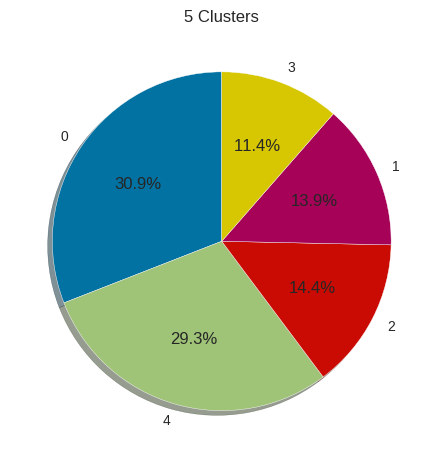

In [ ]:
# 군집별 빈도 수
market = rfm_df.clusters.value_counts()
g = plt.pie(market, labels=market.index, autopct='%.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
plt.show()

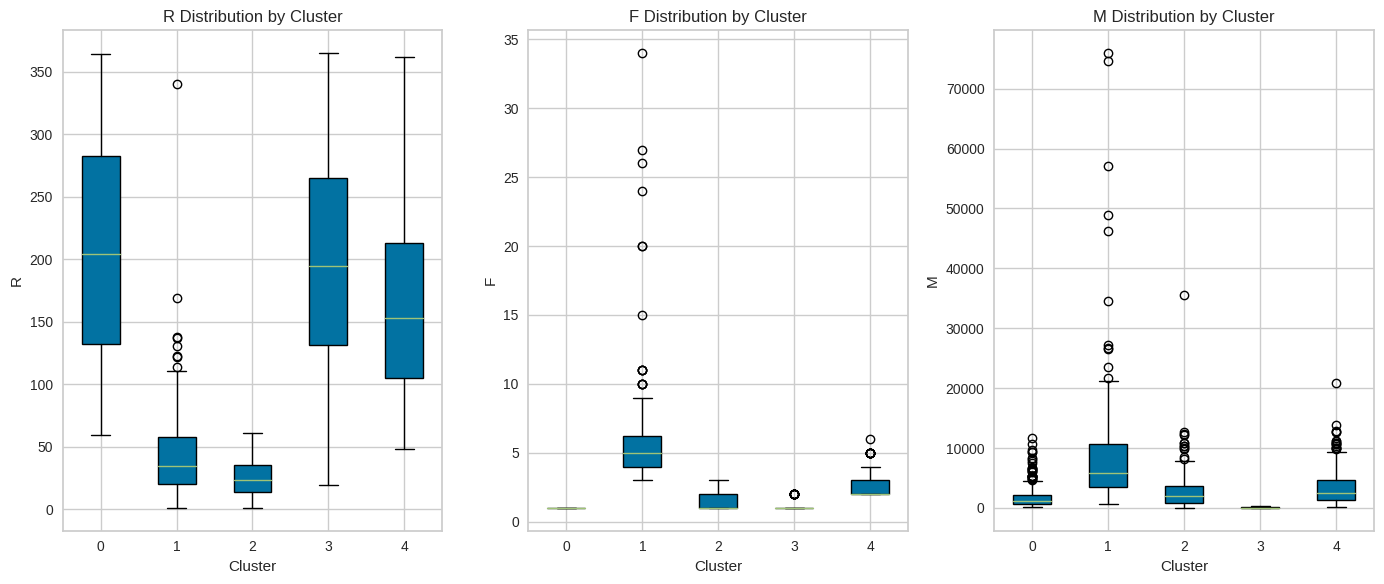

In [ ]:
cluster_means = rfm_df.groupby('clusters')[['R','F','M']].mean()

# Boxplot
plt.figure(figsize=(14, 6))

# 각 군집별로 박스플롯 그리기
for i, col in enumerate(cluster_means.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot([rfm_df[rfm_df['clusters']==c][col] for c in cluster_means.index], patch_artist=True)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Cluster')
    plt.xticks(range(1, len(cluster_means.index)+1), cluster_means.index)

plt.tight_layout()
plt.show()

 최솟값을 활용한 이유 :  
  CV는 표준편차의 크기를 평균으로 나눈 것으로 크기나 단위가 다른 분포 간의 변동을 비교 할 때 사용한다.  
  이때 CV값이 작다는 것은 해당 변수가 평균으로 부터 변동성이 작다는 것을 의미하며 변동성이 가장 작은 수치를 찾아내기 위해 CV의 최솟값을 활용

In [ ]:
# R 가중치 구하기
cv_r0 = rfm_df[rfm_df['clusters']==0]['R'].mean() / rfm_df[rfm_df['clusters']==0]['R'].std()
cv_r1 = rfm_df[rfm_df['clusters']==1]['R'].mean() / rfm_df[rfm_df['clusters']==1]['R'].std()
cv_r2 = rfm_df[rfm_df['clusters']==2]['R'].mean() / rfm_df[rfm_df['clusters']==2]['R'].std()
cv_r3 = rfm_df[rfm_df['clusters']==3]['R'].mean() / rfm_df[rfm_df['clusters']==3]['R'].std()
cv_r4 = rfm_df[rfm_df['clusters']==4]['R'].mean() / rfm_df[rfm_df['clusters']==4]['R'].std()
print(cv_r0, cv_r1, cv_r2, cv_r3, cv_r4)

2.3142491870654993 1.1801198796031815 1.806959978063679 2.3386666183274936 2.1809301303934707


In [ ]:
# 첫번째 가중치
w_1 = cv_r1 / (cv_r0 + cv_r1 + cv_r2 + cv_r3 + cv_r4)

In [ ]:
# F 가중치 구하기
cv_f0 = rfm_df[rfm_df['clusters']==0]['F'].mean() / rfm_df[rfm_df['clusters']==0]['F'].std()
cv_f1 = rfm_df[rfm_df['clusters']==1]['F'].mean() / rfm_df[rfm_df['clusters']==1]['F'].std()
cv_f2 = rfm_df[rfm_df['clusters']==2]['F'].mean() / rfm_df[rfm_df['clusters']==2]['F'].std()
cv_f3 = rfm_df[rfm_df['clusters']==3]['F'].mean() / rfm_df[rfm_df['clusters']==3]['F'].std()
cv_f4 = rfm_df[rfm_df['clusters']==4]['F'].mean() / rfm_df[rfm_df['clusters']==4]['F'].std()
print(cv_f0, cv_f1, cv_f2, cv_f3, cv_f4)

inf 1.448438893372259 2.596367503058181 3.808582254091559 3.277515616793224


In [ ]:
# 두번째 가중치
w_2 = cv_f1 / (cv_f1 + cv_f2 + cv_f3 + cv_f4)

In [ ]:
# M 가중치 구하기
cv_m0 = rfm_df[rfm_df['clusters']==0]['M'].mean() / rfm_df[rfm_df['clusters']==0]['M'].std()
cv_m1 = rfm_df[rfm_df['clusters']==1]['M'].mean() / rfm_df[rfm_df['clusters']==1]['M'].std()
cv_m2 = rfm_df[rfm_df['clusters']==2]['M'].mean() / rfm_df[rfm_df['clusters']==2]['M'].std()
cv_m3 = rfm_df[rfm_df['clusters']==3]['M'].mean() / rfm_df[rfm_df['clusters']==3]['M'].std()
cv_m4 = rfm_df[rfm_df['clusters']==4]['M'].mean() / rfm_df[rfm_df['clusters']==4]['M'].std()
print(cv_m0, cv_m1, cv_m2, cv_m3, cv_m4)

1.0356704033419775 0.8661970238398262 0.8517030961379599 1.18836373807067 1.1908196282186316


In [ ]:
# 세번째 가중치
w_3 = cv_m2 / (cv_m0 + cv_m1 + cv_m2 + cv_m3 + cv_m4)

In [ ]:
# 최종 가중치 생성
W_1 = w_1 / (w_1 + w_2 + w_3)
W_2 = w_2 / (w_1 + w_2 + w_3)
W_3 = w_3 / (w_1 + w_2 + w_3)
print(W_1, W_2, W_3)

0.28869818266776825 0.31263679052329113 0.3986650268089407


In [ ]:
# rfm_score 를 0~100점으로 구분
# RFM점수 = W1 * Recency + W2 * Frequency + W3 * Monetary
# RFM점수 = 0.289 * Recency + 0.313 * Frequency + 0.398 * Monetary
rfm_df['rfm_score'] =((W_1 * rfm_log['R_log']) + (W_2 * rfm_log['F_log']) + (W_3 * rfm_log['M_log'])) * 100

In [ ]:
# rfm가중치 스코어 4분위 경계값
quintiles = rfm_df[['rfm_score']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'rfm_score': {0.2: 26.4138955445644,
  0.4: 32.17804547785333,
  0.6: 39.112870473410354,
  0.8: 47.1438055640319}}

In [ ]:
def rfm_grade(x):
    if x <= quintiles['rfm_score'][.2]:
        return "Bronze"
    elif x <= quintiles['rfm_score'][.4]:
        return "Silver"
    elif x <= quintiles['rfm_score'][.6]:
        return "Gold"
    elif x <= quintiles['rfm_score'][.8]:
        return "Platinum"
    else:
        return "Diamond"

In [ ]:
# 그룹 나누기
rfm_df['rfm_grade'] = rfm_df['rfm_score'].apply(lambda x: rfm_grade(x))

In [ ]:
rfm_df

,고객ID,R,F,M,re_R,R_log,F_log,M_log,clusters,rfm_score,rfm_grade
0,USER_0000,108,1,30.99,0.009259,-4.682131,0.000000,3.433665,3,18.140058,Bronze
1,USER_0001,60,3,13834.90,0.016667,-4.094345,1.098612,9.534950,1,52.401021,Diamond
2,USER_0002,74,2,1442.12,0.013514,-4.304065,0.693147,7.273870,4,39.758707,Platinum
3,USER_0003,18,1,1360.07,0.055556,-2.890372,0.000000,7.215291,2,40.323247,Platinum
4,USER_0004,108,1,1442.47,0.009259,-4.682131,0.000000,7.274112,0,31.764347,Silver
...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,271,1,544.34,0.003690,-5.602119,0.000000,6.299574,0,23.805345,Bronze
1464,USER_1464,88,3,2363.05,0.011364,-4.477337,1.098612,7.767708,4,44.257508,Platinum
1465,USER_1465,195,2,101.56,0.005128,-5.273000,0.693147,4.620650,3,25.604940,Bronze
1466,USER_1466,70,1,298.00,0.014286,-4.248495,0.000000,5.697093,0,28.291650,Silver


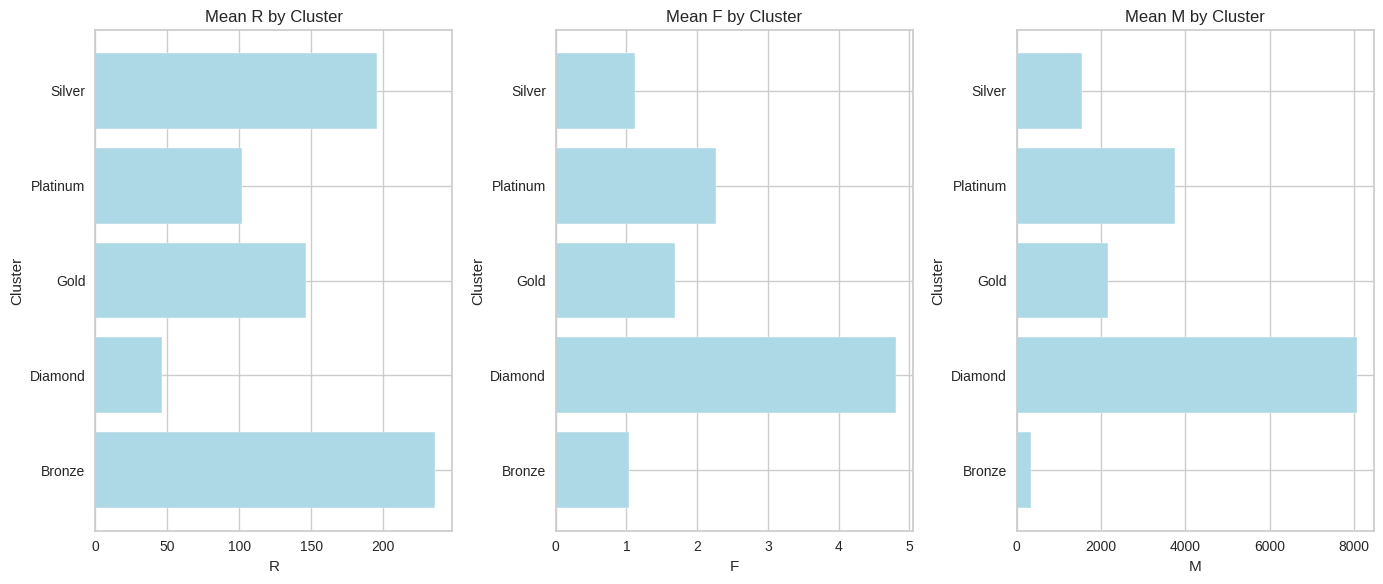

In [ ]:
# 군집별  R, F, M 평균 추출
cluster_means = rfm_df.groupby('rfm_grade')[['R','F','M']].mean()

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 각 군집별로 막대 그래프 그리기
for i, col in enumerate(cluster_means.columns):
    plt.subplot(1, 3, i+1)
    plt.barh(cluster_means.index, cluster_means[col], color='lightblue')
    plt.ylabel('Cluster')
    plt.xlabel(col)
    plt.title(f'Mean {col} by Cluster')

plt.tight_layout()
plt.show()

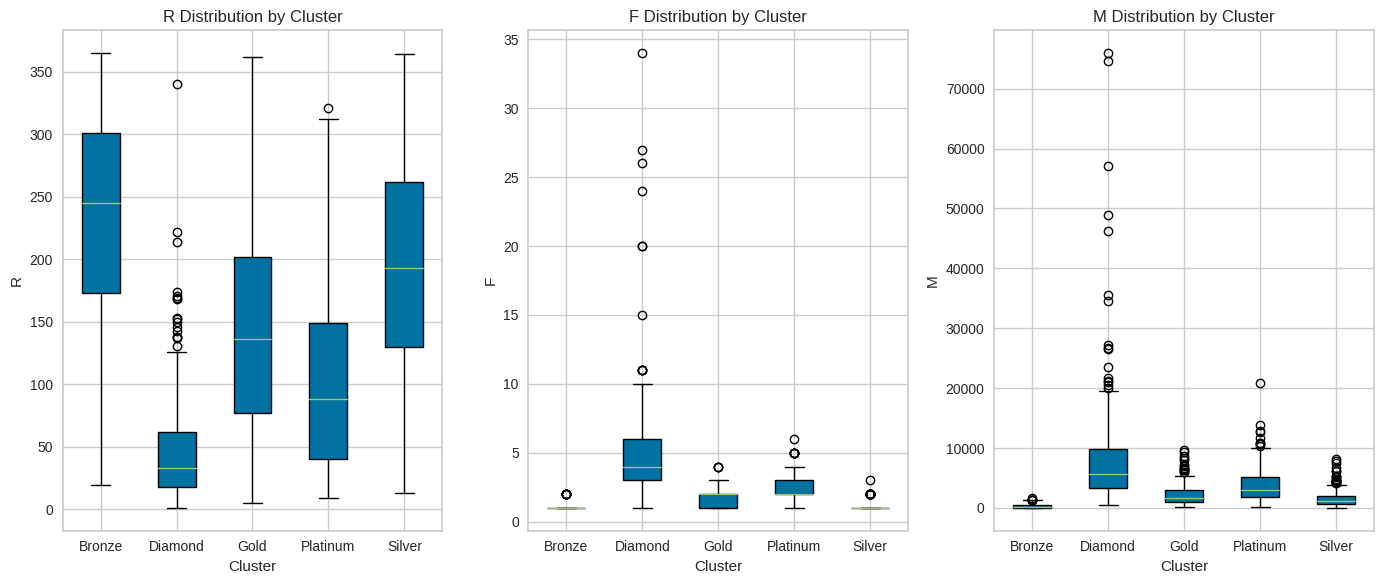

In [ ]:
# Boxplot
plt.figure(figsize=(14, 6))

# 각 군집별로 박스플롯 그리기
for i, col in enumerate(cluster_means.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot([rfm_df[rfm_df['rfm_grade']==c][col] for c in cluster_means.index], patch_artist=True)
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Cluster')
    plt.xticks(range(1, len(cluster_means.index)+1), cluster_means.index)

plt.tight_layout()
plt.show()

In [ ]:
# 등급별 R,F,M 통계
desired_order = ['Diamond','Platinum', 'Gold', 'Silver', 'Bronze']

result = rfm_df.groupby('rfm_grade')[['R', 'F', 'M']].mean().reindex(desired_order)
result

,R,F,M
rfm_grade,,,
Diamond,46.513605,4.816327,8069.979048
Platinum,101.989761,2.266212,3749.404198
Gold,146.108844,1.683673,2179.835408
Silver,195.559727,1.126280,1556.361160
Bronze,236.312925,1.030612,349.523537


In [ ]:
# rfm_grade 별로 통계적으로 유의미한 차이가 있는지 검정
from scipy.stats import f_oneway

# 그룹별 데이터 추출
group_diamond = rfm_df[rfm_df['rfm_grade'] == 'Diamond']['R']
group_platinum = rfm_df[rfm_df['rfm_grade'] == 'Platinum']['R']
group_gold = rfm_df[rfm_df['rfm_grade'] == 'Gold']['R']
group_silver = rfm_df[rfm_df['rfm_grade'] == 'Silver']['R']
group_bronze = rfm_df[rfm_df['rfm_grade'] == 'Bronze']['R']

# 분산 분석 수행
f_statistic, p_value = f_oneway(group_diamond, group_platinum, group_gold, group_silver, group_bronze)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 278.8444665953351
p-value: 3.00519578776926e-178


In [ ]:
from scipy.stats import f_oneway

# 그룹별 데이터 추출
group_diamond = rfm_df[rfm_df['rfm_grade'] == 'Diamond']['F']
group_platinum = rfm_df[rfm_df['rfm_grade'] == 'Platinum']['F']
group_gold = rfm_df[rfm_df['rfm_grade'] == 'Gold']['F']
group_silver = rfm_df[rfm_df['rfm_grade'] == 'Silver']['F']
group_bronze = rfm_df[rfm_df['rfm_grade'] == 'Bronze']['F']

# 분산 분석 수행
f_statistic, p_value = f_oneway(group_diamond, group_platinum, group_gold, group_silver, group_bronze)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 230.25517209627517
p-value: 2.1215476424410385e-153


In [ ]:
from scipy.stats import f_oneway

# 그룹별 데이터 추출
group_diamond = rfm_df[rfm_df['rfm_grade'] == 'Diamond']['M']
group_platinum = rfm_df[rfm_df['rfm_grade'] == 'Platinum']['M']
group_gold = rfm_df[rfm_df['rfm_grade'] == 'Gold']['M']
group_silver = rfm_df[rfm_df['rfm_grade'] == 'Silver']['M']
group_bronze = rfm_df[rfm_df['rfm_grade'] == 'Bronze']['M']

# 분산 분석 수행
f_statistic, p_value = f_oneway(group_diamond, group_platinum, group_gold, group_silver, group_bronze)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 142.3471915452116
p-value: 7.638204242878686e-103


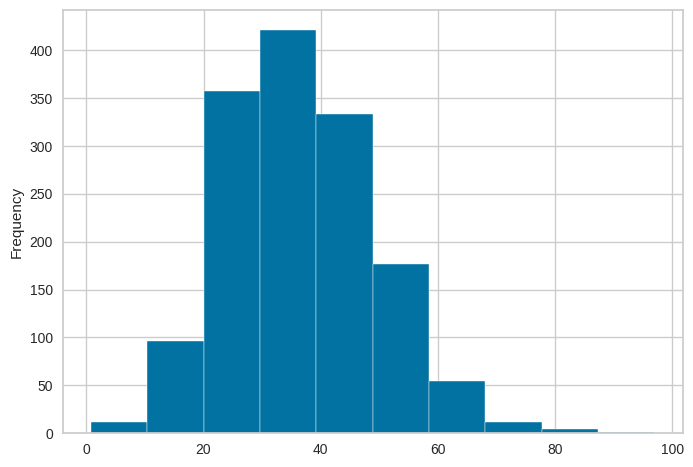

In [ ]:
rfm_df['rfm_score'].plot(kind='hist');

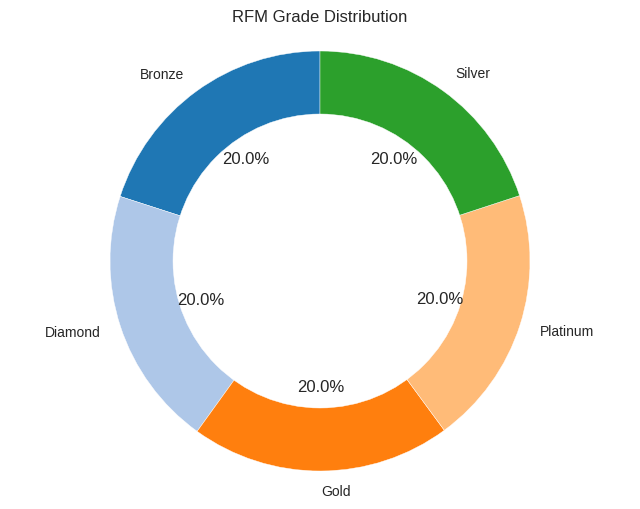

In [ ]:
rfm_grade_counts = rfm_df['rfm_grade'].value_counts()

# 도넛 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(rfm_grade_counts, labels=rfm_grade_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)
plt.title('RFM Grade Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# K-means 클러스터수
rfm_df['clusters'].value_counts()

0    454
4    430
2    212
1    204
3    168
Name: clusters, dtype: int64

In [ ]:
# 재구성한 등급별 수
rfm_df['rfm_grade'].value_counts()

Bronze      294
Diamond     294
Gold        294
Platinum    293
Silver      293
Name: rfm_grade, dtype: int64

In [ ]:
# R, F, M 점수 구간화
def get_rfm_scores(dataframe) :
    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["R"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(df_["F"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
    df_["monetary_score"] = pd.qcut(df_["M"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(str)
    return df_

rfm1 = get_rfm_scores(rfm_df)

In [ ]:
# 기욤 마틴 R,F 점수 고객 세분화
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm1['segment'] = rfm1['RFM_SCORE'].replace(seg_map, regex = True)
rfm1.head()

,고객ID,R,F,M,re_R,R_log,F_log,M_log,clusters,rfm_score,rfm_grade,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,USER_0000,108,1,30.99,0.009259,-4.682131,0.000000,3.433665,3,18.140058,Bronze,3,1,1,31,about_to_sleep
1,USER_0001,60,3,13834.90,0.016667,-4.094345,1.098612,9.534950,1,52.401021,Diamond,4,4,5,44,loyal_customers
2,USER_0002,74,2,1442.12,0.013514,-4.304065,0.693147,7.273870,4,39.758707,Platinum,4,3,3,43,potential_loyalists
3,USER_0003,18,1,1360.07,0.055556,-2.890372,0.000000,7.215291,2,40.323247,Platinum,5,1,3,51,new_customers
4,USER_0004,108,1,1442.47,0.009259,-4.682131,0.000000,7.274112,0,31.764347,Silver,3,1,3,31,about_to_sleep


In [ ]:
!pip install squarify

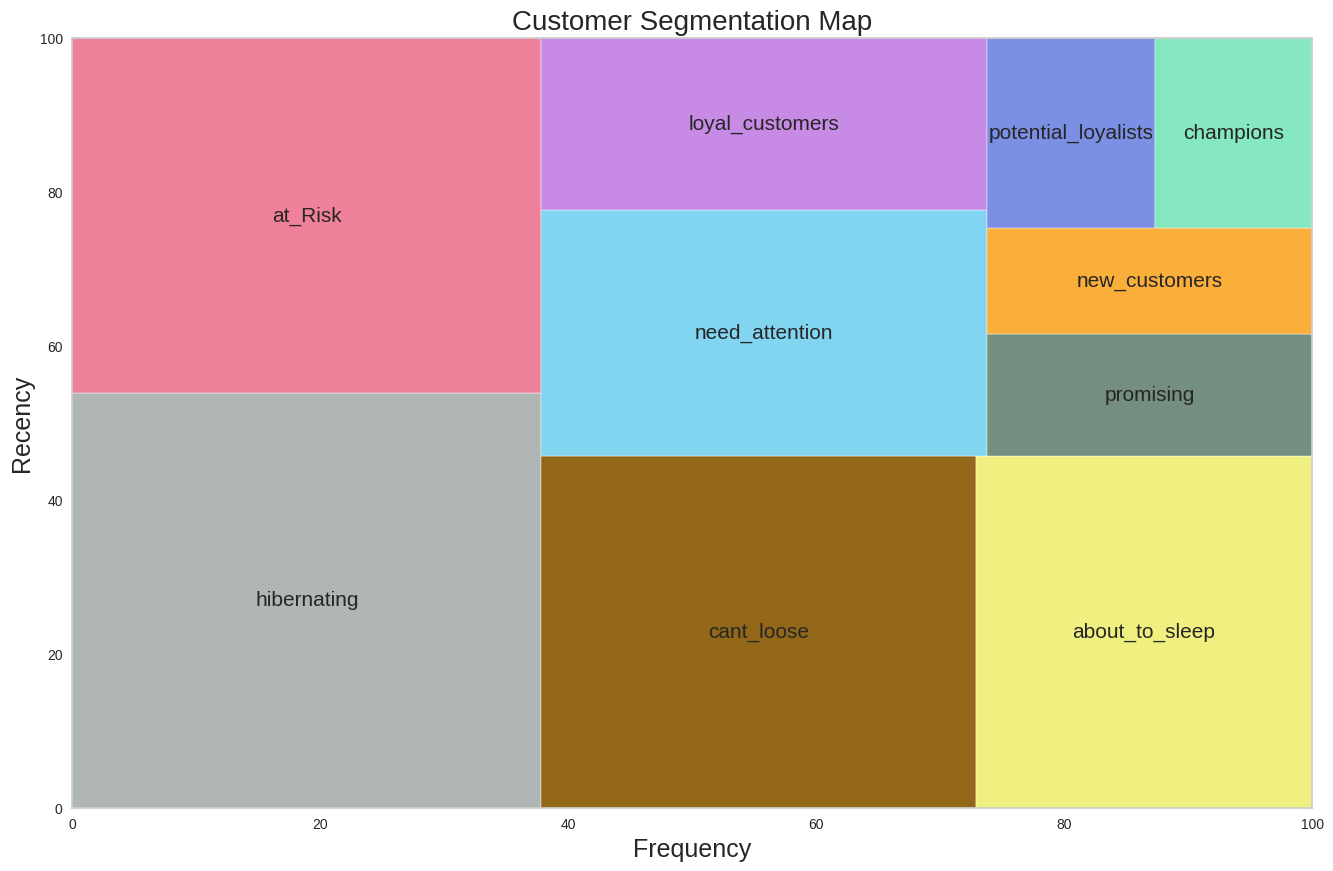

In [ ]:
import squarify
segments = rfm1["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

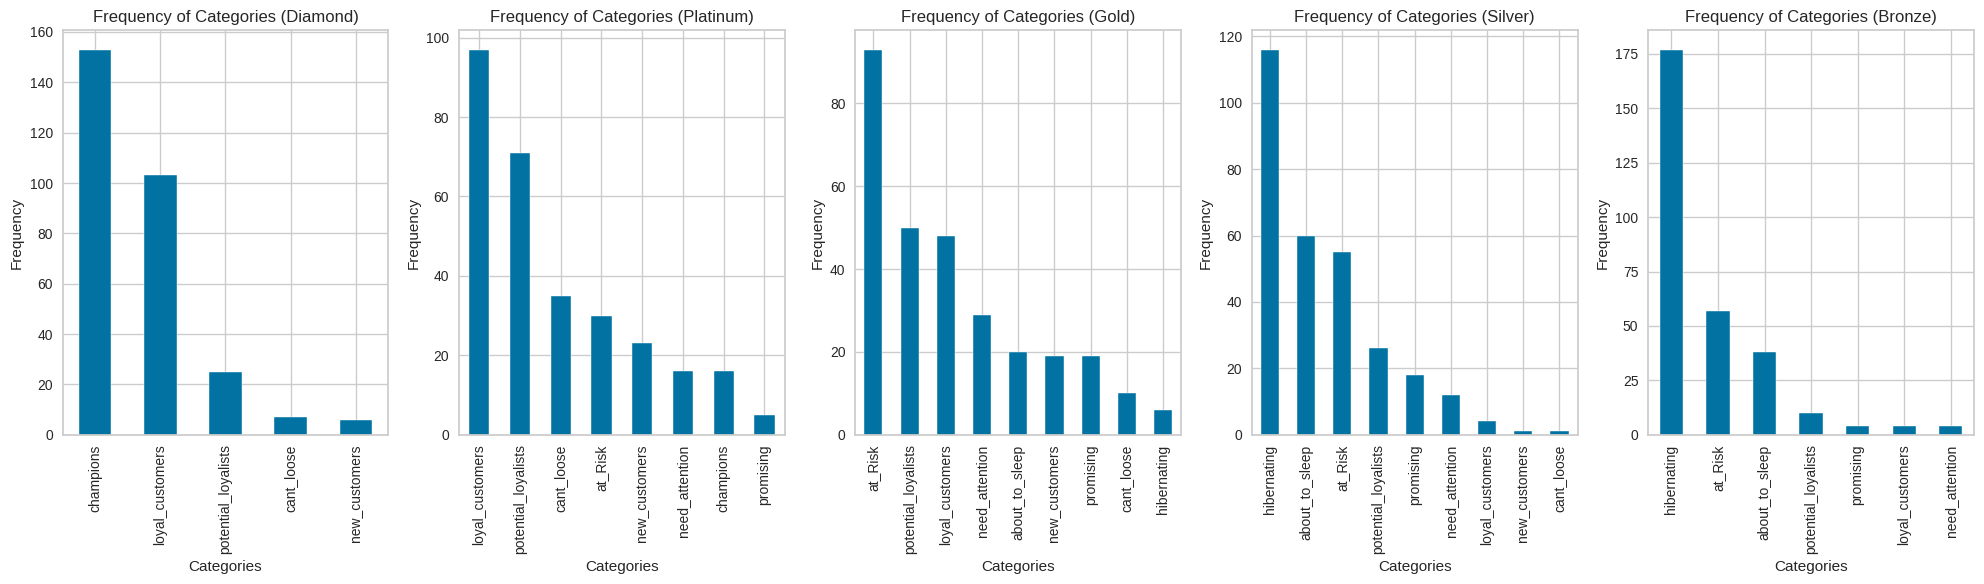

In [ ]:
# 등급별 고객 세분화
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for i, grade in enumerate(['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']):
    category_counts = rfm1[rfm1['rfm_grade'] == grade]['segment'].value_counts()
    category_counts.plot(kind='bar', ax=axes[i])  # 각 등급에 해당하는 서브플롯에 그래프 그리기
    axes[i].set_title(f'Frequency of Categories ({grade})')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Diamond, Platinum 전체 매출 퍼센트
round((rfm1[rfm1['rfm_grade'] == 'Diamond']['M'].sum() + rfm1[rfm1['rfm_grade'] == 'Platinum']['M'].sum()) / rfm1['M'].sum() * 100,2)

74.32

In [ ]:
rfm1[rfm1['rfm_grade'] == 'Diamond']['segment'].value_counts()

champions              153
loyal_customers        103
potential_loyalists     25
cant_loose               7
new_customers            6
Name: segment, dtype: int64

In [ ]:
grades = ['Bronze', 'Silver','Gold','Platinum','Diamond']

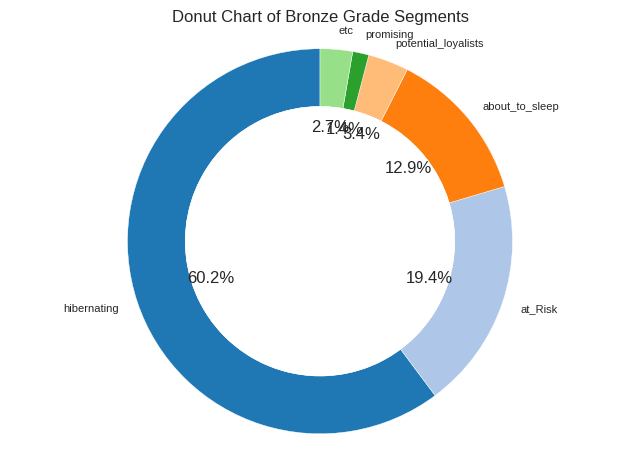

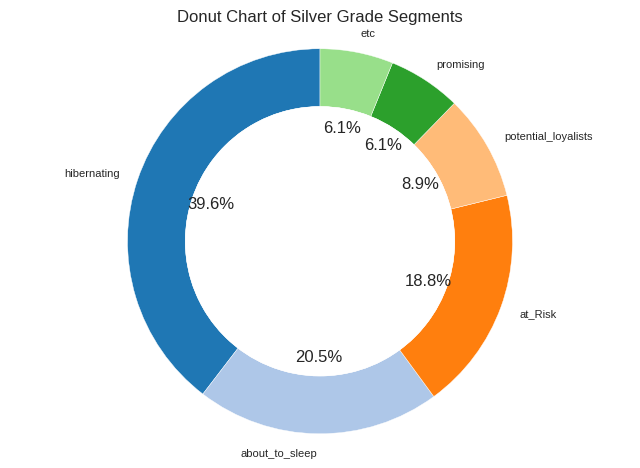

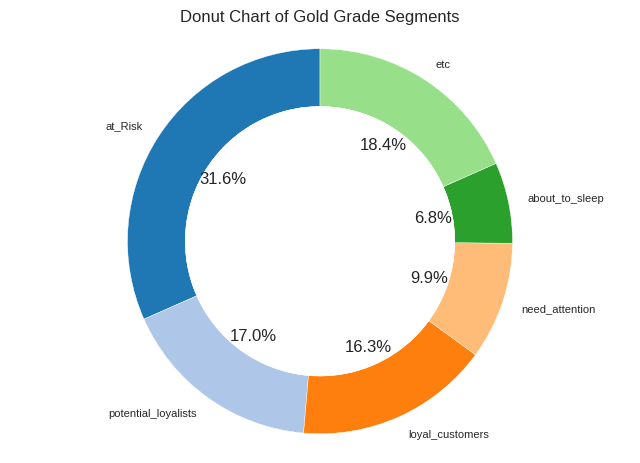

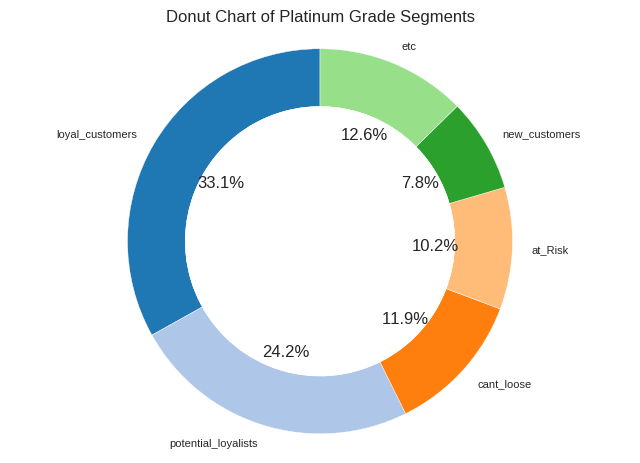

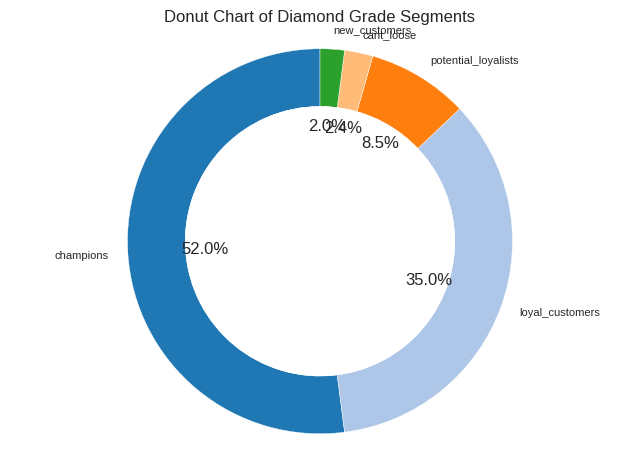

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 빈도수 상위 5개 항목만 포함하고 나머지는 'etc'로 합침
def combine_top5_and_etc(segments):
    top5 = segments[:5]
    etc_count = segments[5:].sum()
    if len(segments) > 5:
        top5['etc'] = etc_count
    return top5

# 각 RFM 등급에 대한 도넛 차트를 그리는 함수
def plot_donut_chart(segments, grade):
    # 빈도수 상위 5개 항목만 포함하고 나머지는 'etc'로 합침
    segments = combine_top5_and_etc(segments)

    # 도넛 차트 그리기
    fig, ax = plt.subplots()
    wedges, labels, autopct = ax.pie(segments.values, labels=segments.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.3))

    # 가운데 구멍 뚫기
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)

    # 라벨 위치 조정
    for label, wedge in zip(labels, wedges):
        angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))
        if angle > 90 and angle <= 270:
            label.set_horizontalalignment('right')
        else:
            label.set_horizontalalignment('left')

        # 글씨 크기 조절
        label.set_fontsize(8)

    plt.axis('equal')
    plt.title(f'Donut Chart of {grade} Grade Segments')
    plt.show()

# 각 RFM 등급에 대한 도넛 차트 그리기
for grade in grades:
    # 세그먼트 추출
    segments = rfm1[rfm1['rfm_grade'] == grade]['segment'].value_counts()
    # 도넛 차트 그리기
    plot_donut_chart(segments, grade)


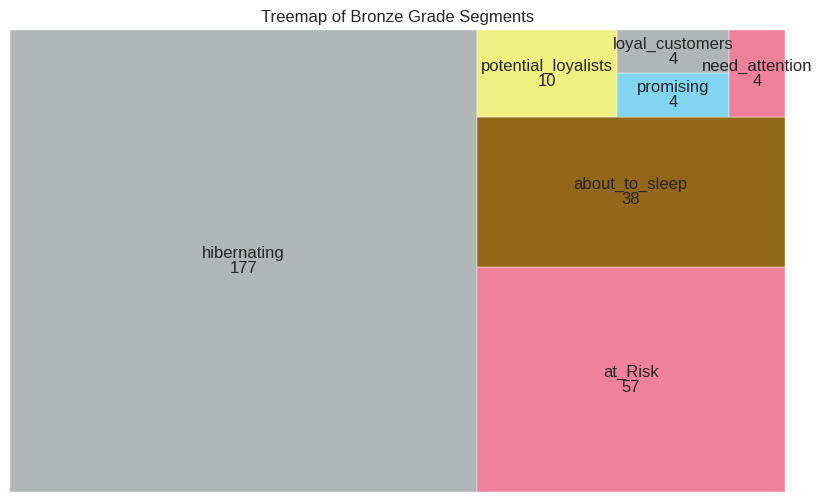

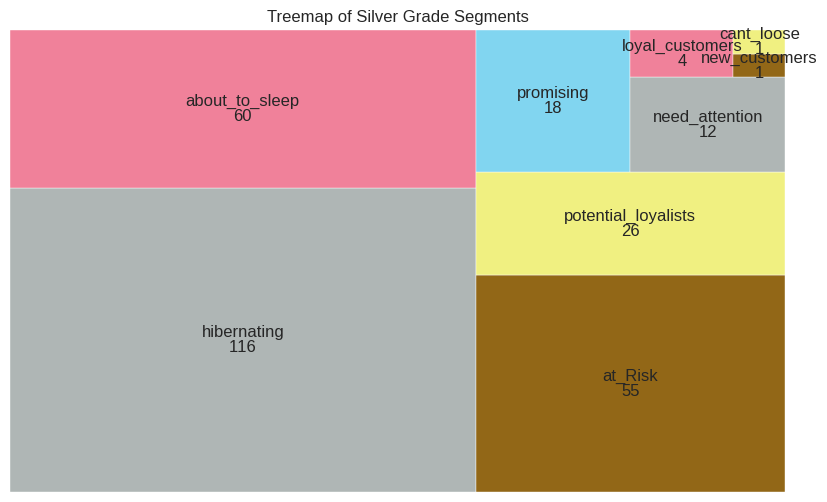

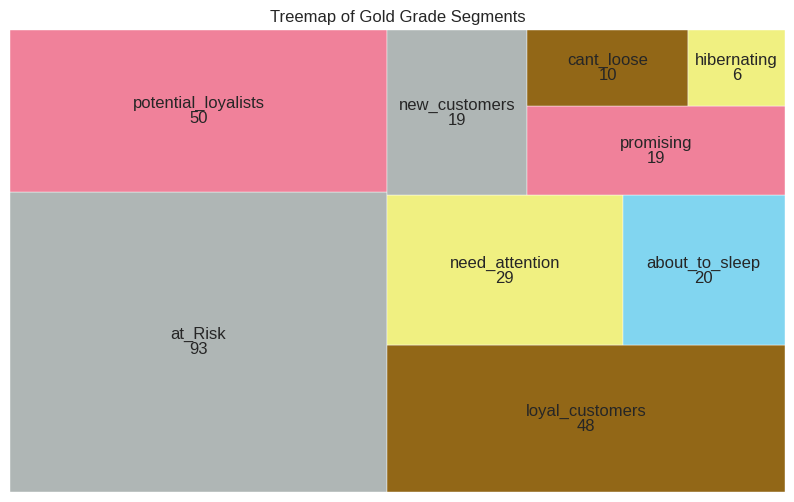

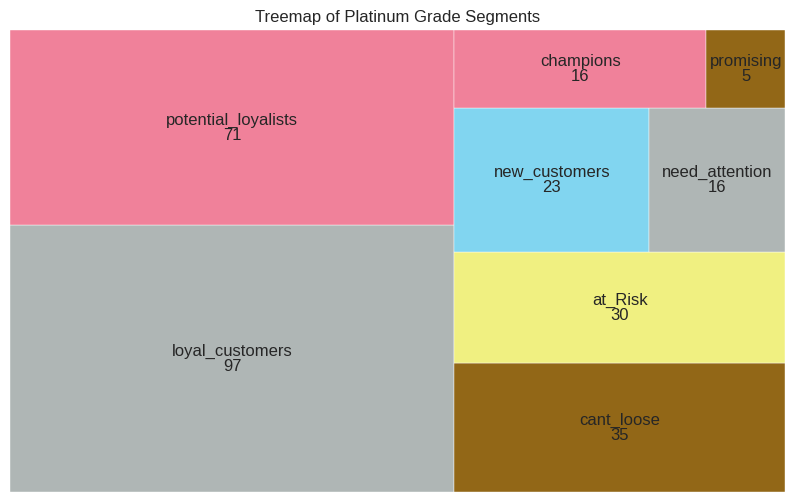

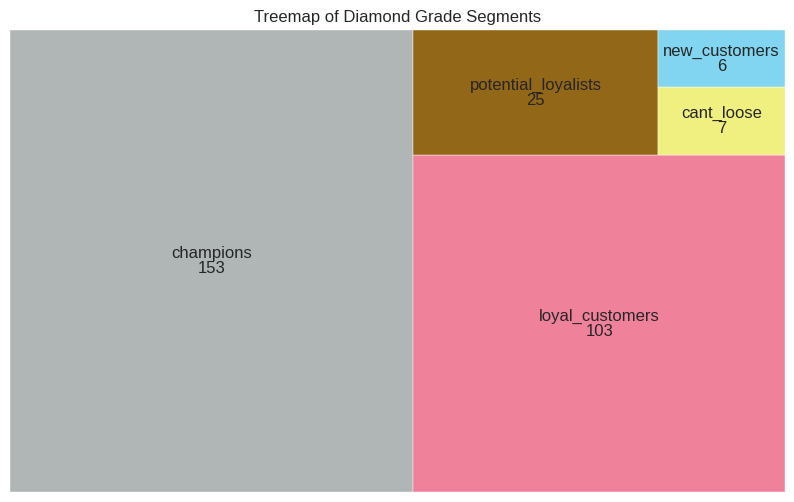

In [ ]:
for grade in grades:
  segments = rfm1[rfm1['rfm_grade'] == grade]['segment'].value_counts()
  plt.figure(figsize=(10, 6))
  squarify.plot(sizes=segments.values, label=segments.index, color=["#AFB6B5", "#F0819A", "#926717", "#F0F081", "#81D5F0"],
                value = segments.values)
  plt.axis('off')  # 축 제거
  plt.title(f'Treemap of {grade} Grade Segments')
  plt.show()

In [ ]:
# 데이터 결합
customer_rfm = pd.merge(customer_df, rfm1[['고객ID','rfm_grade','segment']],on='고객ID')

In [ ]:
customer_rfm

,고객ID,성별,지역,가입기간,L,R,F,M,구매건수,쿠폰미사용,쿠폰사용,쿠폰사용실패,rfm_grade,segment
0,USER_0000,여,New York,31,0,107,1,30.99,2,0,2,0,Bronze,about_to_sleep
1,USER_0001,남,New York,20,223,59,3,13834.90,60,14,20,26,Diamond,loyal_customers
2,USER_0002,남,California,39,119,73,2,1442.12,23,1,11,11,Platinum,potential_loyalists
3,USER_0003,남,California,25,0,17,1,1360.07,17,3,6,8,Platinum,new_customers
4,USER_0004,여,Chicago,31,0,107,1,1442.47,36,8,11,17,Silver,about_to_sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,여,California,5,0,270,1,544.34,7,1,3,3,Bronze,at_Risk
1464,USER_1464,남,New York,43,105,87,3,2363.05,40,3,16,21,Platinum,loyal_customers
1465,USER_1465,남,Chicago,25,76,194,2,101.56,8,1,3,4,Bronze,at_Risk
1466,USER_1466,여,Chicago,47,0,69,1,298.00,1,1,0,0,Silver,potential_loyalists


In [ ]:
# 등급별 성별별 고객수
customer_rfm.groupby('rfm_grade')['성별'].value_counts()

rfm_grade  성별
Bronze     여     190
           남     104
Diamond    여     174
           남     120
Gold       여     193
           남     101
Platinum   여     188
           남     105
Silver     여     189
           남     104
Name: 성별, dtype: int64

In [ ]:
# 등급별 지역별 고객수
customer_rfm.groupby('rfm_grade')['지역'].value_counts()

rfm_grade  지역           
Bronze     California        96
           Chicago           82
           New York          68
           New Jersey        36
           Washington DC     12
Diamond    Chicago          100
           California        88
           New York          59
           New Jersey        29
           Washington DC     18
Gold       California        91
           Chicago           89
           New York          73
           New Jersey        25
           Washington DC     16
Platinum   Chicago           93
           California        81
           New York          70
           New Jersey        29
           Washington DC     20
Silver     California       108
           Chicago           92
           New York          54
           New Jersey        30
           Washington DC      9
Name: 지역, dtype: int64

In [ ]:
customer_rfm.query('rfm_grade == "Diamond"').groupby(['rfm_grade', 'segment'])['성별'].value_counts()

rfm_grade  segment              성별
Diamond    cant_loose           여      4
                                남      3
           champions            여     91
                                남     62
           loyal_customers      여     61
                                남     42
           new_customers        남      3
                                여      3
           potential_loyalists  여     15
                                남     10
Name: 성별, dtype: int64

In [ ]:
customer_rfm.query('rfm_grade == "Platinum"').groupby(['rfm_grade', 'segment'])['성별'].value_counts()

rfm_grade  segment              성별
Platinum   at_Risk              여     17
                                남     13
           cant_loose           여     22
                                남     13
           champions            여     12
                                남      4
           loyal_customers      여     63
                                남     34
           need_attention       여      9
                                남      7
           new_customers        여     17
                                남      6
           potential_loyalists  여     44
                                남     27
           promising            여      4
                                남      1
Name: 성별, dtype: int64

In [ ]:
customer_rfm.query('rfm_grade == "Gold"').groupby(['rfm_grade', 'segment'])['성별'].value_counts()

rfm_grade  segment              성별
Gold       about_to_sleep       남     13
                                여      7
           at_Risk              여     63
                                남     30
           cant_loose           여      7
                                남      3
           hibernating          여      5
                                남      1
           loyal_customers      여     26
                                남     22
           need_attention       여     17
                                남     12
           new_customers        여     16
                                남      3
           potential_loyalists  여     36
                                남     14
           promising            여     16
                                남      3
Name: 성별, dtype: int64

In [ ]:
customer_rfm.query('rfm_grade == "Silver"').groupby(['rfm_grade', 'segment'])['성별'].value_counts()

rfm_grade  segment              성별
Silver     about_to_sleep       여     33
                                남     27
           at_Risk              여     35
                                남     20
           cant_loose           남      1
           hibernating          여     74
                                남     42
           loyal_customers      여      3
                                남      1
           need_attention       여     10
                                남      2
           new_customers        남      1
           potential_loyalists  여     21
                                남      5
           promising            여     13
                                남      5
Name: 성별, dtype: int64

In [ ]:
customer_rfm.query('rfm_grade == "Bronze"').groupby(['rfm_grade', 'segment'])['성별'].value_counts()

rfm_grade  segment              성별
Bronze     about_to_sleep       여      23
                                남      15
           at_Risk              여      38
                                남      19
           hibernating          여     114
                                남      63
           loyal_customers      여       3
                                남       1
           need_attention       여       4
           potential_loyalists  남       5
                                여       5
           promising            여       3
                                남       1
Name: 성별, dtype: int64

## 세부 분석(솔루션 제안)

### 다이아몬드

In [ ]:
customer_rfm.head()

,고객ID,성별,지역,가입기간,L,R,F,M,구매건수,쿠폰미사용,쿠폰사용,쿠폰사용실패,rfm_grade,segment
0,USER_0000,여,New York,31,0,107,1,30.99,2,0,2,0,Bronze,about_to_sleep
1,USER_0001,남,New York,20,223,59,3,13834.90,60,14,20,26,Diamond,loyal_customers
2,USER_0002,남,California,39,119,73,2,1442.12,23,1,11,11,Platinum,potential_loyalists
3,USER_0003,남,California,25,0,17,1,1360.07,17,3,6,8,Platinum,new_customers
4,USER_0004,여,Chicago,31,0,107,1,1442.47,36,8,11,17,Silver,about_to_sleep


In [ ]:
sale_coupon_tax.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,총금액,쿠폰코드,할인율,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,ELEC10,10.0,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,ELEC10,10.0,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,OFF10,10.0,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,SALE10,10.0,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,AIO10,10.0,0.18


In [ ]:
diamond_id = list(customer_rfm[customer_rfm['rfm_grade'] == 'Diamond']['고객ID'])
platinum_id = list(customer_rfm[customer_rfm['rfm_grade'] == 'Platinum']['고객ID'])
gold_id = list(customer_rfm[customer_rfm['rfm_grade'] == 'Gold']['고객ID'])
silver_id = list(customer_rfm[customer_rfm['rfm_grade'] == 'Silver']['고객ID'])
bronze_id = list(customer_rfm[customer_rfm['rfm_grade'] == 'Bronze']['고객ID'])

In [ ]:
customer_rfm[customer_rfm['rfm_grade'] == 'Diamond']

,고객ID,성별,지역,가입기간,L,R,F,M,구매건수,쿠폰미사용,쿠폰사용,쿠폰사용실패,rfm_grade,segment
1,USER_0001,남,New York,20,223,59,3,13834.90,60,14,20,26,Diamond,loyal_customers
8,USER_0008,여,California,27,139,40,2,9950.31,77,12,21,44,Diamond,potential_loyalists
9,USER_0009,남,New York,32,72,99,4,4954.12,69,10,21,38,Diamond,loyal_customers
25,USER_0025,여,New Jersey,14,323,40,5,5600.17,44,8,14,22,Diamond,champions
28,USER_0028,여,New Jersey,50,112,17,3,2466.96,18,5,3,10,Diamond,champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,USER_1445,여,New York,33,235,12,2,2904.37,35,2,12,21,Diamond,champions
1449,USER_1449,여,Chicago,29,129,20,2,2124.03,27,4,11,12,Diamond,champions
1453,USER_1453,남,Washington DC,44,107,87,5,4403.60,60,6,25,29,Diamond,loyal_customers
1459,USER_1459,남,New York,20,301,34,3,5893.31,52,12,15,25,Diamond,champions


In [ ]:
# 다이아몬드 고객 구매이력
diamond_sales = onlinesales[onlinesales['고객ID'].isin(diamond_id)]
diamond_sales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,연도-월,총금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2019-01,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,2019-01,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,2019-01,16.50


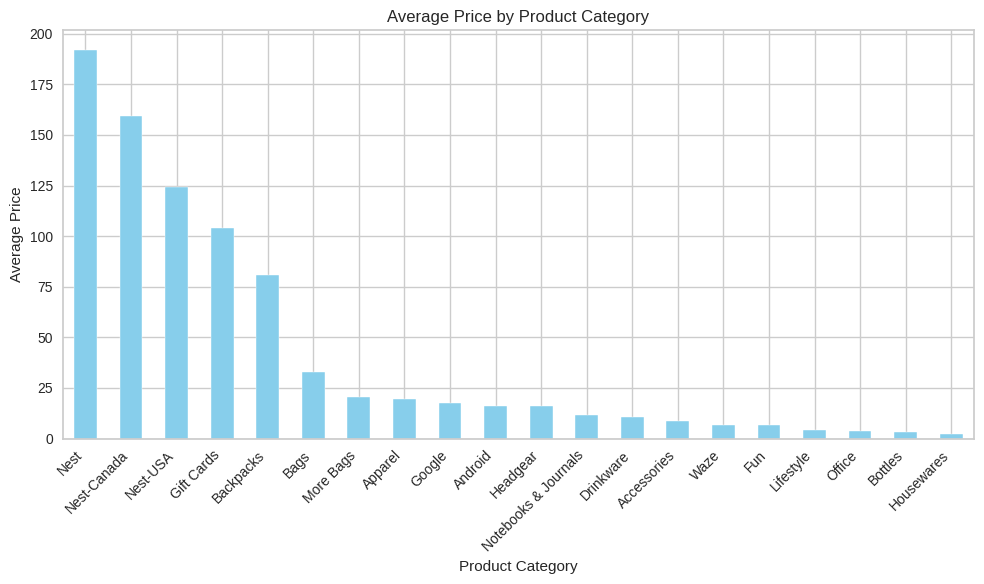

In [ ]:
# 그래프 데이터 생성
category_mean_price = diamond_sales.groupby('제품카테고리')['평균금액'].mean().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
category_mean_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

다이아몬드 내 VIP 손님들 대상으로 진행  
평균가가 높은 Nest 카테고리 프리미엄 상품에 대해 기간제 할인 이벤트 진행

In [ ]:
# 다이아몬드 내 VIP 손님들 대상으로 진행
# 평균가가 높은 Nest 카테고리의 프리미엄 상품에 대해 기간제 할인 이벤트 진행

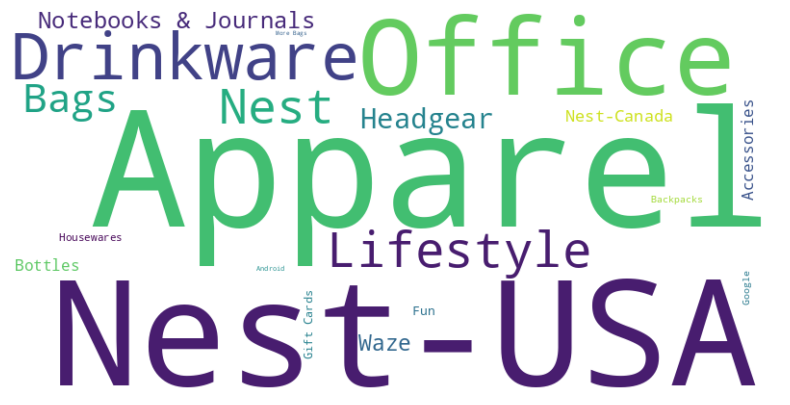

In [ ]:
# 카테고리 정보 추출
categories = diamond_sales['제품카테고리'].value_counts()

# WordCloud 객체 생성 및 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(categories)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 충성 고객으로 변환시킬 전략이 필요 -> 구매 유도 프로그램 진행
# 다이아몬드 그룹 내 가장 구매가 많은 카테고리인 Apparel, Nest-USA, Office에 대한 프로모션 제공

In [ ]:
# 다이아몬드 등급 구매 주기
diamond_duration = diamond_sales.groupby(['고객ID','거래날짜'])['거래ID'].count().reset_index()
diamond_duration = diamond_duration[['고객ID','거래날짜']]
diamond_duration['이전거래날짜'] = diamond_duration.groupby('고객ID')['거래날짜'].shift(1)
diamond_duration['날짜차이'] = (diamond_duration['거래날짜'] - diamond_duration['이전거래날짜']).dt.days
print('다이아몬드 등급 평균 방문 주기 : {}일'.format(round(diamond_duration.groupby(['고객ID'])['날짜차이'].mean().mean())))
# 방문주기를 앞당기는 프로모션 준비

다이아몬드 등급 평균 방문 주기 : 68일


### 플래티넘

In [ ]:
customer_rfm[customer_rfm['rfm_grade']=='Platinum']['segment'].value_counts()

loyal_customers        97
potential_loyalists    71
cant_loose             35
at_Risk                30
new_customers          23
need_attention         16
champions              16
promising               5
Name: segment, dtype: int64

In [ ]:
platinum_id = customer_rfm[customer_rfm['rfm_grade']=='Platinum']['고객ID'].to_list()
platinum_sales = onlinesales[onlinesales['고객ID'].isin(platinum_id)]
platinum_sales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,연도-월,총금액
65,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,2019-01,153.71
298,USER_0284,Transaction_0167,2019-01-03,Product_0983,Nest-USA,1,122.77,6.5,Clicked,2019-01,122.77
299,USER_0284,Transaction_0168,2019-01-03,Product_0904,Office,1,2.05,6.5,Clicked,2019-01,2.05
300,USER_0284,Transaction_0168,2019-01-03,Product_0915,Lifestyle,1,3.61,6.5,Clicked,2019-01,3.61
301,USER_0284,Transaction_0168,2019-01-03,Product_0916,Lifestyle,1,3.61,6.5,Clicked,2019-01,3.61


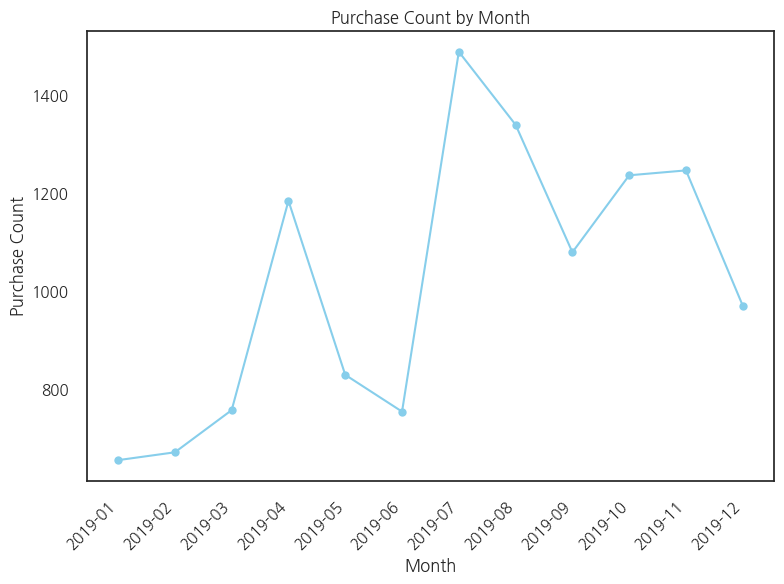

In [ ]:
# 월별 구매 건수 계산
purchase_count_by_month = platinum_sales.groupby(platinum_sales['연도-월'])['거래ID'].count()

# 그래프 그리기
plt.figure(figsize=(8, 6))
purchase_count_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Purchase Count by Month')
plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.grid(False)

# x 축 눈금 설정
plt.xticks(rotation=45, ha='right', ticks=range(len(purchase_count_by_month)), labels=[str(month) for month in purchase_count_by_month.index])

plt.tight_layout()
plt.show()

### 골드

In [ ]:
print('Gold 매출 비율 : {}%'.format(round(customer_rfm[customer_rfm['rfm_grade']=='Gold']['M'].sum() / customer_rfm['M'].sum() * 100,2)))

Gold 매출 비율 : 13.72%


In [ ]:
gold_id = customer_rfm[customer_rfm['rfm_grade']=='Gold']['고객ID'].to_list()
gold_info = onlinesales[onlinesales['고객ID'].isin(gold_id)]
gold_info.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,연도-월,총금액
26,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used,2019-01,2.47
27,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked,2019-01,226.72
28,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked,2019-01,1.64
29,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked,2019-01,1.64
30,USER_0066,Transaction_0009,2019-01-01,Product_1142,Notebooks & Journals,26,7.93,102.79,Not Used,2019-01,206.18


In [ ]:
# 골드 그룹 제품카테고리 연관 규칙 분석
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

grouped = gold_info.groupby(['고객ID','거래ID'])['제품카테고리'].apply(set).reset_index()

# 각 거래에서의 제품 카테고리 리스트를 불리언 형태의 데이터프레임으로 변환
te = TransactionEncoder()
te_ary = te.fit(grouped['제품카테고리']).transform(grouped['제품카테고리'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 빈발 항목 집합 찾기
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# 연관규칙 추출
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(Notebooks & Journals),(Office),0.023053,0.147797,0.013832,0.600000,4.059619,0.010425,2.130507,0.771456
45,"(Lifestyle, Drinkware)",(Office),0.024590,0.147797,0.014344,0.583333,3.946852,0.010710,2.045287,0.765456
3,(Headgear),(Apparel),0.022285,0.351178,0.012807,0.574713,1.636527,0.004981,1.525608,0.397815
40,"(Drinkware, Bags)",(Office),0.020748,0.147797,0.011527,0.555556,3.758906,0.008460,1.917456,0.749516
22,"(Drinkware, Bags)",(Apparel),0.020748,0.351178,0.010758,0.518519,1.476511,0.003472,1.347553,0.329565
42,"(Bags, Office)",(Drinkware),0.022541,0.102971,0.011527,0.511364,4.966079,0.009206,1.835780,0.817051
26,"(Lifestyle, Drinkware)",(Apparel),0.024590,0.351178,0.012039,0.489583,1.394116,0.003403,1.271161,0.289827
23,"(Apparel, Bags)",(Drinkware),0.023053,0.102971,0.010758,0.466667,4.532007,0.008384,1.681929,0.797738
17,(Lifestyle),(Office),0.068904,0.147797,0.031762,0.460967,3.118914,0.021579,1.580983,0.729651
1,(Drinkware),(Apparel),0.102971,0.351178,0.047387,0.460199,1.310443,0.011226,1.201965,0.264093


- 플래티넘, 다이아 등급으로 가기 위한 장바구니 분석으로 고객ID, 거래ID로 진행
- 제품카테고리 마케팅 전략으로 같이 본 상품에 노출해 구매 빈도를 증가 시키는 전략

### 실버, 브론즈

In [ ]:
# Silver, Bronze별 고객 세그먼트
customer_rfm[(customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver')]['segment'].value_counts()

hibernating            293
at_Risk                112
about_to_sleep          98
potential_loyalists     36
promising               22
need_attention          16
loyal_customers          8
new_customers            1
cant_loose               1
Name: segment, dtype: int64

In [ ]:
print('Bronze, Silver 등급 방문 비율')
print('Bronze, Silver 등급 중 1번만 방문한 고객 비율 {}%'.format(round((customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver'))]['F'] == 1).sum() * 100 / customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver'))].shape[0])))
print('Bronze, Silver 등급 중 2번만 방문한 고객 비율 {}%'.format(round((customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver'))]['F'] == 2).sum() * 100 / customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver'))].shape[0])))
print('Bronze, Silver 등급 중 3번만 방문한 고객 비율 {}%'.format(round((customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver'))]['F'] == 3).sum() * 100 / customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver'))].shape[0])))

Bronze, Silver 등급 방문 비율
Bronze, Silver 등급 중 1번만 방문한 고객 비율 92%
Bronze, Silver 등급 중 2번만 방문한 고객 비율 7%
Bronze, Silver 등급 중 3번만 방문한 고객 비율 0%


In [ ]:
# Bronze, Silver 등급 위험 고객
customer_rfm[((customer_rfm['rfm_grade'] == 'Bronze') | (customer_rfm['rfm_grade']=='Silver')) & (customer_rfm['segment'].isin(['hibernating','at_Risk']))]

,고객ID,성별,지역,가입기간,L,R,F,M,구매건수,쿠폰미사용,쿠폰사용,쿠폰사용실패,rfm_grade,segment
22,USER_0022,남,New York,9,0,172,1,725.93,16,5,7,4,Silver,hibernating
24,USER_0024,여,New Jersey,43,0,262,1,2239.74,20,2,6,12,Silver,hibernating
27,USER_0027,여,Chicago,32,0,222,1,31.52,3,0,2,1,Bronze,hibernating
40,USER_0040,여,New York,39,0,166,1,993.38,14,2,2,10,Silver,hibernating
50,USER_0050,여,New York,28,0,171,1,1271.14,16,2,3,11,Silver,hibernating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,USER_1454,여,New Jersey,28,78,256,2,90.75,3,0,3,0,Bronze,at_Risk
1457,USER_1457,여,California,36,55,202,2,134.99,2,0,2,0,Silver,at_Risk
1462,USER_1462,남,California,45,0,179,1,49.56,4,2,0,2,Bronze,at_Risk
1463,USER_1463,여,California,5,0,270,1,544.34,7,1,3,3,Bronze,at_Risk


- RFM 점수가 낮고, 마지막 방문일 길고, 방문일이 낮은 고객층이다.  
- 이들은 재방문 확률이 낮다.
- 잠재적 이탈 유저로 푸시 알림, 고객 서비스 개선에 대해서 만족도를 높어야 함.


# 5.한계점
- 인구통계학적 정보 : 연령이 있었으면 좀 더 좋은 세분화가 진행이 됬을 것 같다.
- 세션, 장바구니 추가 목록 등 행동로그 데이터가 있었다면 고객의 특성을 이해를 폭 넓게 할 수 있었다.
- 마케팅 비용만 있어, 어떻게 유입이 됬는지, 마케팅 효과를 알아내기 어려웠다.